#**Introduction**

Welcome to the notebook for **Classification of Liver Disease Using Supervised Machine Learning with Python**. In this notebook we're going to understand the data of patients with liver disease and no liver disease, discuss about the information we can gain from it and create machine learning models to classify the patients and choose the best model.

#**Mounting**


In [1]:
# mounting Google Drive in the runtime's virtual machine

import os                                     

import google.colab                           

if not os.path.isdir('/content/drive'):

    google.colab.drive.mount('/content/drive')

In [2]:
# development root directory 

root_directory = '/content/drive/MyDrive/Research 2021/G1 Md. Mahin Rahman_1530814_Sumiya Akter_1730764/Development'

# changing to root directory

os.chdir(root_directory)

In [3]:
# list of files and folder 
!ls

Binary_Classification_of_Liver_Disease.ipynb  hcvdat0.csv  ROC.png


#**Installations & Imports**

**Required Library Functions**

**Standard Imports**

In [4]:
import sys

import csv

import time

import collections

import datetime

**Other Imports**

In [5]:
modules = {'numpy': False, 'pandas': False, 'matplotlib': False, 'seaborn': False, 'missingno': False,  
           'zipfile': False, 'sklearn': False,  'requests': False, 'sklearn.Base': False, 'missingpy': False, 
           'sklearn': False, 'uci-dataset': False, 'imblearn': False,  'stats': False, 'factor_analyzer': False, 
           'qqplot': False, 'plotly':False}

In [6]:
while True:

  try:

    import numpy as np

    modules['numpy'] = True

    import pandas as pd
    
    modules['pandas'] = True

    from matplotlib import pyplot as plt

    modules['matplotlib'] = True

    import seaborn as sns

    modules['seaborn'] = True

    import missingno as msno

    modules['missingno'] = True

    from zipfile import ZipFile

    modules['zipfile'] = True
    
    #sklearn modules

    import sklearn

    modules['sklearn'] = True

    import sklearn.neighbors._base

    sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

    from sklearn.experimental import enable_iterative_imputer 

    from sklearn.impute import IterativeImputer #Imputation Module - to implement MICE

    from sklearn import preprocessing, feature_selection ,model_selection, metrics
    
    from sklearn import linear_model, ensemble, tree, neighbors, naive_bayes, neural_network, svm, calibration 

    modules['sklearn'] = True

    #Over Sampling Modules

    import imblearn 

    modules['imblearn'] = True

    from imblearn import over_sampling

    #Imputation Module - MissForest

    import missingpy

    modules['missingpy'] = True    

    #Module for statistical analysis

    from scipy import stats as stats

    modules['stats'] = True 

    from factor_analyzer import factor_analyzer

    modules['factor_analyzer'] = True

    from statsmodels.stats import outliers_influence

    from statsmodels.graphics.gofplots import qqplot
   
    modules['qqplot'] = True

    from statsmodels.tools.tools import add_constant

    import statsmodels.api as sm

    #Plotly module for exclusive plotting

    import plotly.graph_objects as go

    modules['plotly'] = True

    import plotly.express as px

    #other necessary modules for the project

    import requests

    modules['requests'] = True

    import uci_dataset

    modules['uci-dataset'] = True

    import pylab
    
    import joblib

    print('Successfully Imported!!')

    break

  except:

    if modules['numpy'] == False: 

      print('Installing numpy')
      
      !pip install numpy

      continue

    if modules['pandas'] == False:

      print('Installing pandas')

      !pip install pandas

      continue
     
    if modules['matplotlib'] == False:

      print('Installing matplotlib')      

      !pip install matplotlib

      continue

    if modules['seaborn'] == False:

      print('Installing seaborn')

      !pip install seaborn

      continue

    if modules['missingno'] == False:

      print('Installing missingno')

      !pip install missingno

      continue

    if modules['missingpy'] == False:

      print('Installing missingpy')
      
      !pip install missingpy

      continue

    if modules['sklearn'] == False:

      print('Installing sklearn')
      
      !pip install scikit-learn

      continue

    if modules['stats'] == False:

      print('Installing scipy')
      
      !pip install scipy

      continue

    if modules['factor_analyzer'] == False:

      print('Installing factor_analyzer')
      
      !pip install factor_analyzer

      continue

    if modules['qqplot'] == False:

      print('Installing statmodels')
      
      !pip install statsmodels

      continue
    
    if modules['plotly'] == False:

      print('Installing plotly')
      
      !pip install plotly

      continue
      
    if modules['requests'] == False:

      print('Installing requests')
      
      !pip install requests

      continue
      
    if modules['uci-dataset'] == False:

      print('Installing uci-dataset')
      
      !pip install uci-dataset

      continue
  
    print('Packages Installed Successfully')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Successfully Imported!!


In [7]:
pd.pandas.set_option('display.max_columns', None)

#**Initializations**

In [8]:
development_directory = root_directory

#**Data Downloading and Extraction**

In [9]:
#  The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.

dataset_name = 'HCV'

dataset_filename = 'hcvdat0.csv'

dataset_download_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv'

dataset_donated_date = datetime.date(2020, 6, 10)

In [10]:
def download_dataset(dataset_name, dataset_filename, dataset_download_url):
  
  if not os.path.exists(dataset_filename):

    response = requests.get(dataset_download_url, allow_redirects=True)

    with open(dataset_filename, 'wb') as file:
      
      file.write(response.content)

    print('{0} Downloaded'.format(dataset_name))

  else:
    
    print('{0} Already Exists'.format(dataset_name))


# we can directly use the dataset from UCI repository too

# df_uci=uci_dataset.load_hcv()

In [11]:
download_dataset(dataset_name, dataset_filename, dataset_download_url)

HCV Already Exists


#**Exploratory Data Analysis**

In [12]:
hcv_df = pd.read_csv(os.path.join(development_directory, dataset_filename))

**Dataset Information**

In [13]:
hcv_df.info(verbose='all', memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 134.6 KB


In [14]:
print('Number of Columns: {0}'.format(len(hcv_df.columns)))

hcv_df.columns

Number of Columns: 14


Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

**Dropping Column(s): Unnamed: 0**

In [15]:
hcv_df.drop(columns=hcv_df.columns[0], axis=1, inplace=True)

In [16]:
print('Number of Columns: {0}'.format(len(hcv_df.columns)))

hcv_df.columns

Number of Columns: 13


Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [17]:
hematological_features = ['ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

**Checking for Duplicate Rows**

In [18]:
hcv_df.duplicated().sum()

0

**Checking for Unique Values**

In [19]:
hcv_df.nunique()

Category      5
Age          49
Sex           2
ALB         189
ALP         414
ALT         341
AST         297
BIL         188
CHE         407
CHOL        313
CREA        117
GGT         358
PROT        198
dtype: int64

In [20]:
for column in hcv_df.columns:

  print('----------------------------------------------------------------------')

  print('Unique Values of {0}'.format(column))

  print('----------------------------------------------------------------------')

  print(hcv_df[column].unique())

----------------------------------------------------------------------
Unique Values of Category
----------------------------------------------------------------------
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
----------------------------------------------------------------------
Unique Values of Age
----------------------------------------------------------------------
[32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 76 77 74 19 23 25 27 29 30
 75]
----------------------------------------------------------------------
Unique Values of Sex
----------------------------------------------------------------------
['m' 'f']
----------------------------------------------------------------------
Unique Values of ALB
----------------------------------------------------------------------
[38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 44.3 46.4 36.3 39.  38.7
 41.8 40.9 45.2 36.6 42.  

**Distribution and Visualization of Features, both individually and in terms of target feature**

In [21]:
hcv_df['Category'].nunique()

5

In [22]:
hcv_df.Category.value_counts(dropna=False)

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [23]:
#Percentage checking

hcv_df.Category.value_counts(normalize=True)*100

0=Blood Donor             86.666667
3=Cirrhosis                4.878049
1=Hepatitis                3.902439
2=Fibrosis                 3.414634
0s=suspect Blood Donor     1.138211
Name: Category, dtype: float64

**Visualization of Categorical Features: Count Plot**

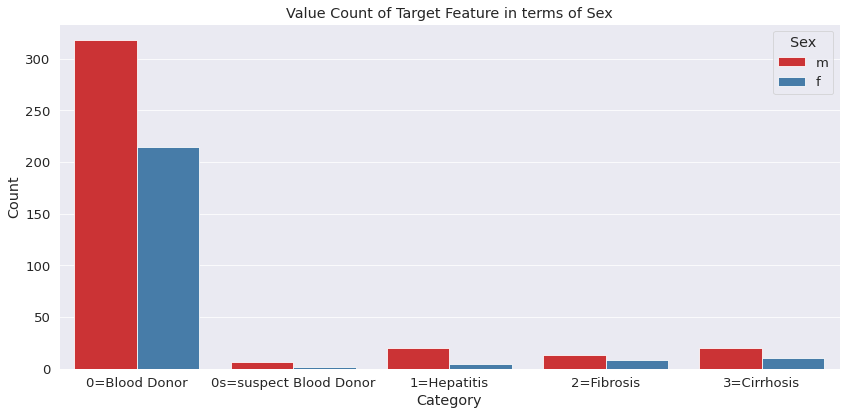

In [24]:
plt.figure(figsize=(12, 6))

sns.set_theme(context='paper', font_scale=1.5)

countplot = sns.countplot(x='Category', hue='Sex',  palette="Set1", data=hcv_df)

countplot.set_ylabel("Count")

countplot.set_title("Value Count of Target Feature in terms of Sex")

plt.tight_layout()

In [25]:
hcv_df.groupby(['Category'], dropna=False)['Sex'].value_counts()

Category                Sex
0=Blood Donor           m      318
                        f      215
0s=suspect Blood Donor  m        6
                        f        1
1=Hepatitis             m       20
                        f        4
2=Fibrosis              m       13
                        f        8
3=Cirrhosis             m       20
                        f       10
Name: Sex, dtype: int64

The following table shows the central tendency (mean) of rest of the features except the 'Sex' feature with respect to the target feature.


In [26]:
hcv_df.groupby(['Category','Sex'], dropna=False).mean()

Age        ALB         ALP         ALT  \
Category               Sex                                                 
0=Blood Donor          f    47.106977  40.971163   67.398140   20.985581   
                       m    47.147799  43.094969   69.018868   30.448742   
0s=suspect Blood Donor f    59.000000  19.300000  208.200000  325.300000   
                       m    57.333333  25.250000   90.483333   64.916667   
1=Hepatitis            f    46.250000  42.500000   31.975000   12.100000   
                       m    37.200000  44.100000   44.500000   30.015789   
2=Fibrosis             f    53.750000  40.375000   38.525000   57.662500   
                       m    51.461538  42.615385   37.500000   60.792308   
3=Cirrhosis            f    55.500000  33.200000  126.387500   19.210000   
                       m    52.450000  32.105263   76.637500   24.850000   

                                   AST        BIL       CHE      CHOL  \
Category               Sex                                              
0=Blood Donor          f     23.675349   6.901860  7.870651  5.496890   
                       m     28.492138   9.626730  8.754686  5.492618   
0s=suspect Blood Donor f    146.600000   6.900000  5.330000  4.720000   
                       m     58.400000   4.316667  7.838333  4.406667   
1=Hepatitis            f     53.850000  11.250000  7.737500  5.077500   
                       m     80.110000  16.500000  9.593000  5.103500   
2=Fibrosis             f     72.087500  12.000000  7.786250  4.642857   
                       m     86.761538  14.307692  8.672308  4.570000   
3=Cirrhosis            f     95.390000  42.600000  4.840000  4.370000   
                       m    113.490000  67.400000  3.307500  3.807778   

                                  CREA         GGT       PROT  
Category               Sex                                     
0=Blood Donor          f     69.297674   22.423721  71.448372  
                       m     85.522013   33.507862  72.559434  
0s=suspect Blood Donor f     32.000000  295.600000  53.100000  
                       m     66.666667  127.500000  54.050000  
1=Hepatitis            f     59.525000   57.075000  79.175000  
                       m     76.845000   99.680000  73.805000  
2=Fibrosis             f     71.387500   62.112500  76.187500  
                       m     74.784615   90.284615  76.046154  
3=Cirrhosis            f    122.970000  138.660000  72.300000  
                       m    145.850000  124.830000  68.868421

**Parallel Coordinate Plot For Comparison of Numerical Features in terms of Target Feature**

In [27]:
parallel = hcv_df.copy()
 
parallel = parallel.drop(['Sex'], axis=1)

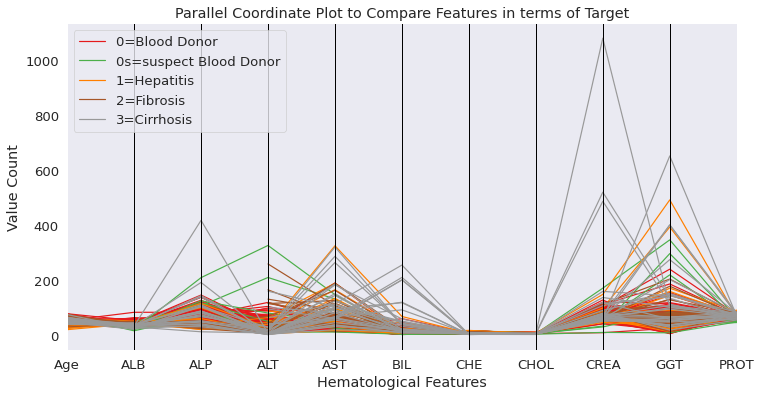

In [28]:
plt.figure(figsize=(12, 6))

parallel_plot = pd.plotting.parallel_coordinates(parallel, 'Category', colormap=plt.get_cmap("Set1"))

parallel_plot.set_title("Parallel Coordinate Plot to Compare Features in terms of Target")

parallel_plot.set_xlabel("Hematological Features")

parallel_plot.set_ylabel("Value Count")

plt.legend(loc='upper left')

plt.show()

From the Parallel Coordinate plot we can see that too high of a value (e.g. >200) indicates the existence of liver disease. Also, it shows us that the chances of the stage of the disease being Cirrhosis is higher than other stages when the values is approximately >200.

**Sankey Plot to visualize the mean distribution for different Categories**

In [29]:
hcv_df.groupby(['Category'], dropna=False).mean()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,
0=Blood Donor,47.131332,42.238274,68.365103,26.631520,26.549156,8.527580,8.398086,5.494316,78.977486,29.036773,72.111257
0s=suspect Blood Donor,57.571429,24.400000,107.300000,102.114286,71.000000,4.685714,7.480000,4.451429,61.714286,151.514286,53.914286
1=Hepatitis,38.708333,43.833333,42.114286,26.900000,75.733333,15.625000,9.283750,5.099167,73.958333,92.579167,74.700000
2=Fibrosis,52.333333,41.761905,37.841667,59.600000,81.171429,13.428571,8.334762,4.595500,73.490476,79.552381,76.100000
3=Cirrhosis,53.466667,32.482759,93.220833,22.970000,107.456667,59.133333,3.818333,4.008571,138.223333,129.440000,70.051724


In [30]:
feature_mean_list = []

for item in hematological_features:

  feature_mean_list.append(list(hcv_df.groupby(by='Category', dropna=False)[item].mean().values))

In [31]:
label_list = ['ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT',
              'No Disease', 'Suspect', 'Hepatitis','Fibrosis','Cirrhosis']
              
#'ALB':0, 'ALP':1, 'ALT':2, 'AST':3,'BIL':4, 'CHE':5, 'CHOL':6, 'CREA':7, 'GGT':8, 
#'PROT':9, 'No Disease':10, 'Suspect':11, 'Hepatitis':12,'Fibrosis':13,'Cirrhosis':14

In [32]:
#defines how many links will generate for each source

source = []

for index, item in enumerate(feature_mean_list):

  for inner_item in item:

    source.append(index)

In [33]:
#defines which link will hit/reach which target

target = []

for item in feature_mean_list:
  
  for i in range(10,15):
  
    target.append(i)

In [34]:
#defines the width/value of links

link_value = [inner_item for item in feature_mean_list for inner_item in item ]

In [35]:
fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list},
    link = {"source": source, "target": target, "value": link_value}
    )])

fig.show()

We notice that the mean for 'cirrhosis', 'fibrosis', 'hepatitis' and 'suspect_disease' in severable variables are higher/lower by a lot than the mean for 'no_disease'. 

**Scatter Plot to compare between features**

Correlation between AST and GGT is: 0.4912625489339381


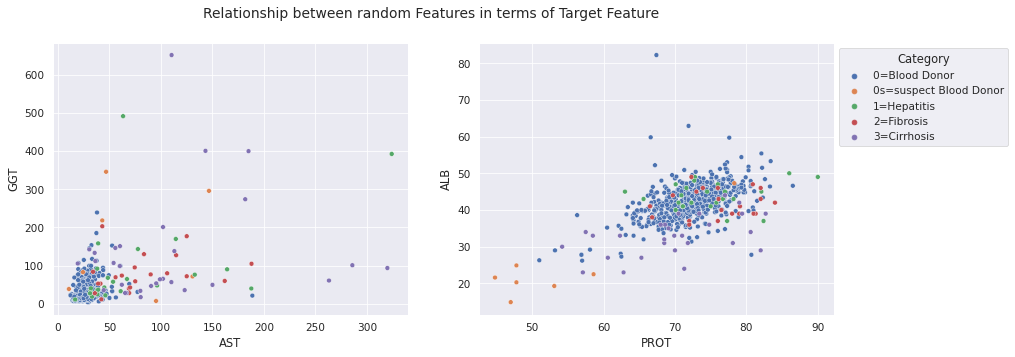

In [525]:
fig, axes = plt.subplots(figsize=[14,5], nrows=1, ncols=2)

fig.suptitle('Relationship between random Features in terms of Target Feature')

sns.set_theme(context='paper', font_scale=1.2)

scatter1 = sns.scatterplot(data=hcv_df, ax=axes[0], x="AST", y="GGT", hue="Category")

scatter1.legend([],[], frameon=False)

scatter2 = sns.scatterplot(data=hcv_df, ax=axes[1], x="PROT", y="ALB", hue="Category")

sns.move_legend(scatter2, "upper left", bbox_to_anchor=(1, 1))

print(f"Correlation between AST and GGT is: {hcv_df['AST'].corr(hcv_df['GGT'])}")

The distribution of Category doesn't seem to follow any pattern for random features from scatterplots, so we'll analyze with some other plots too.

**Histograms on raw data**

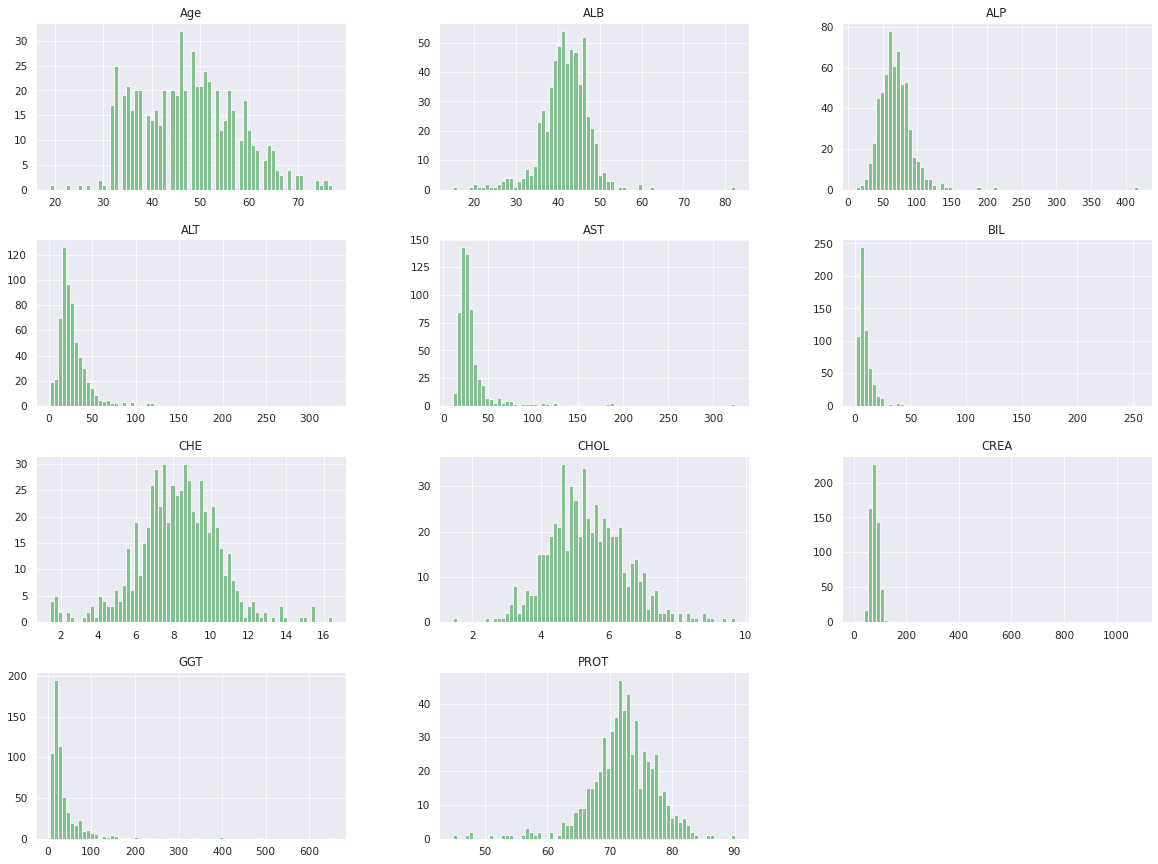

In [38]:
hcv_df.hist(bins=70, figsize=(20,15), color='#86bf91')

plt.show()

Histograms show that most of the variables are right skewed.

In [39]:
hcv_df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


We can see the average mean for each feature fluctuates a lot from each other.

In [40]:
missing_value_count = hcv_df.isnull().sum()

missing_value_percentage = hcv_df.isnull().mean()*100 

missing_value_count_percentage_df = pd.concat([missing_value_count, missing_value_percentage], axis = 1, keys = ['Count', 'Percentage'])

missing_value_count_percentage_df = missing_value_count_percentage_df.sort_values(by = ['Count'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  
  print(missing_value_count_percentage_df)

          Count  Percentage
Category      0    0.000000
Age           0    0.000000
Sex           0    0.000000
AST           0    0.000000
BIL           0    0.000000
CHE           0    0.000000
CREA          0    0.000000
GGT           0    0.000000
ALB           1    0.162602
ALT           1    0.162602
PROT          1    0.162602
CHOL         10    1.626016
ALP          18    2.926829


We can see the percentage of missing values in each feature here

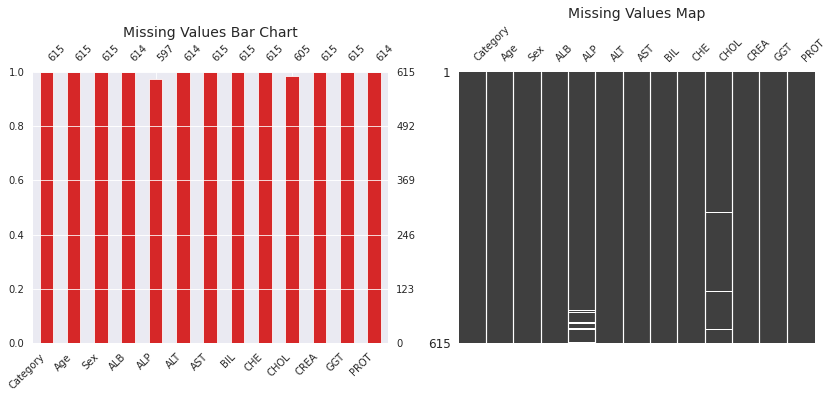

In [41]:
fig, axes = plt.subplots(figsize=[14,5], nrows=1, ncols=2)

missing_bar_plot = msno.bar(hcv_df, ax=axes[0], color="tab:red", fontsize = 10)

missing_matrix_plot = msno.matrix(hcv_df, ax=axes[1], sparkline=False, fontsize = 10)

missing_bar_plot.set_title('Missing Values Bar Chart', fontsize = 14)

missing_matrix_plot.set_title('Missing Values Map', fontsize = 14)

plt.show()

We can visualize number of missing values.

**Letter Value Plot to visualize Extreme Observations**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

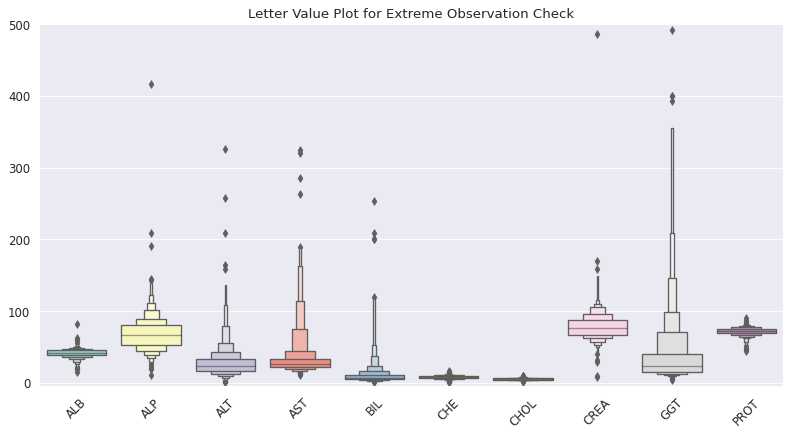

In [42]:
plt.figure(figsize=(12,6),dpi=80)  

plt.title("Letter Value Plot for Extreme Observation Check", fontsize=12)

sns.boxenplot(data = hcv_df[hematological_features], palette="Set3")

plt.ylim(-5, 500)

plt.xticks(rotation=45)

From letter value plot/boxenplot, it is visible that a few values in ALP, ALT, AST, BIL, CREA and GGT can be called as extreme values and it indicates that they might b outliers.

**JointPlot to see distribution of any two random feature**

Text(0.5, 1, 'AST vs ALT joint plot')

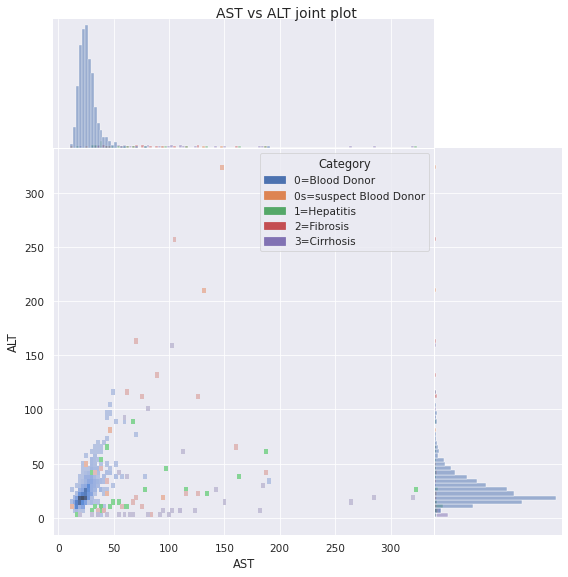

In [43]:
joint = sns.jointplot(x="AST", y="ALT", data=hcv_df, height=8,ratio=3,space=0, hue="Category", kind="hist")

joint.fig.suptitle("AST vs ALT joint plot", y=1)

From joint plot, it seems ALT and AST maintaining a proportional relationship against Category, the more they rise, chances increases that the patient has hepatitis.

**RelPlot**

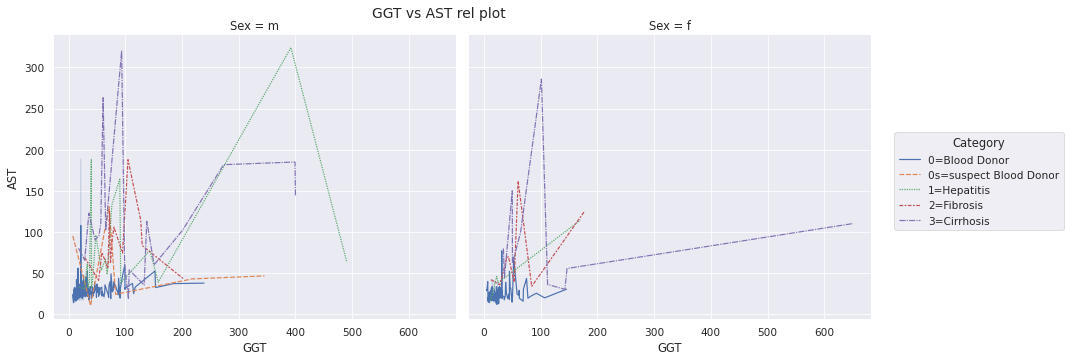

In [44]:
rel = sns.relplot(data=hcv_df, x="GGT", y="AST", kind="line", col="Sex", hue="Category", style="Category")

rel.fig.suptitle("GGT vs AST rel plot", y=1)

sns.move_legend(rel, "center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()

From RelPlot we can se the fluctuations values in GGT vs AST plot, where it seems that a greater value in both GGT and AST may mean the existence of Liver Disease.

**StripPlot**

In [45]:
# def strip_plot(xaxis, yaxis, data_df, **kwargs):  

#     # plt.figure(figsize=(8,4))

#     plt.title(f"{xaxis} vs {yaxis} strip plot")

#     strip = sns.stripplot(x=xaxis, y=yaxis, data=data_df, **kwargs)

#     sns.move_legend(strip, "center left", bbox_to_anchor=(1, 0.5))

#     plt.show()

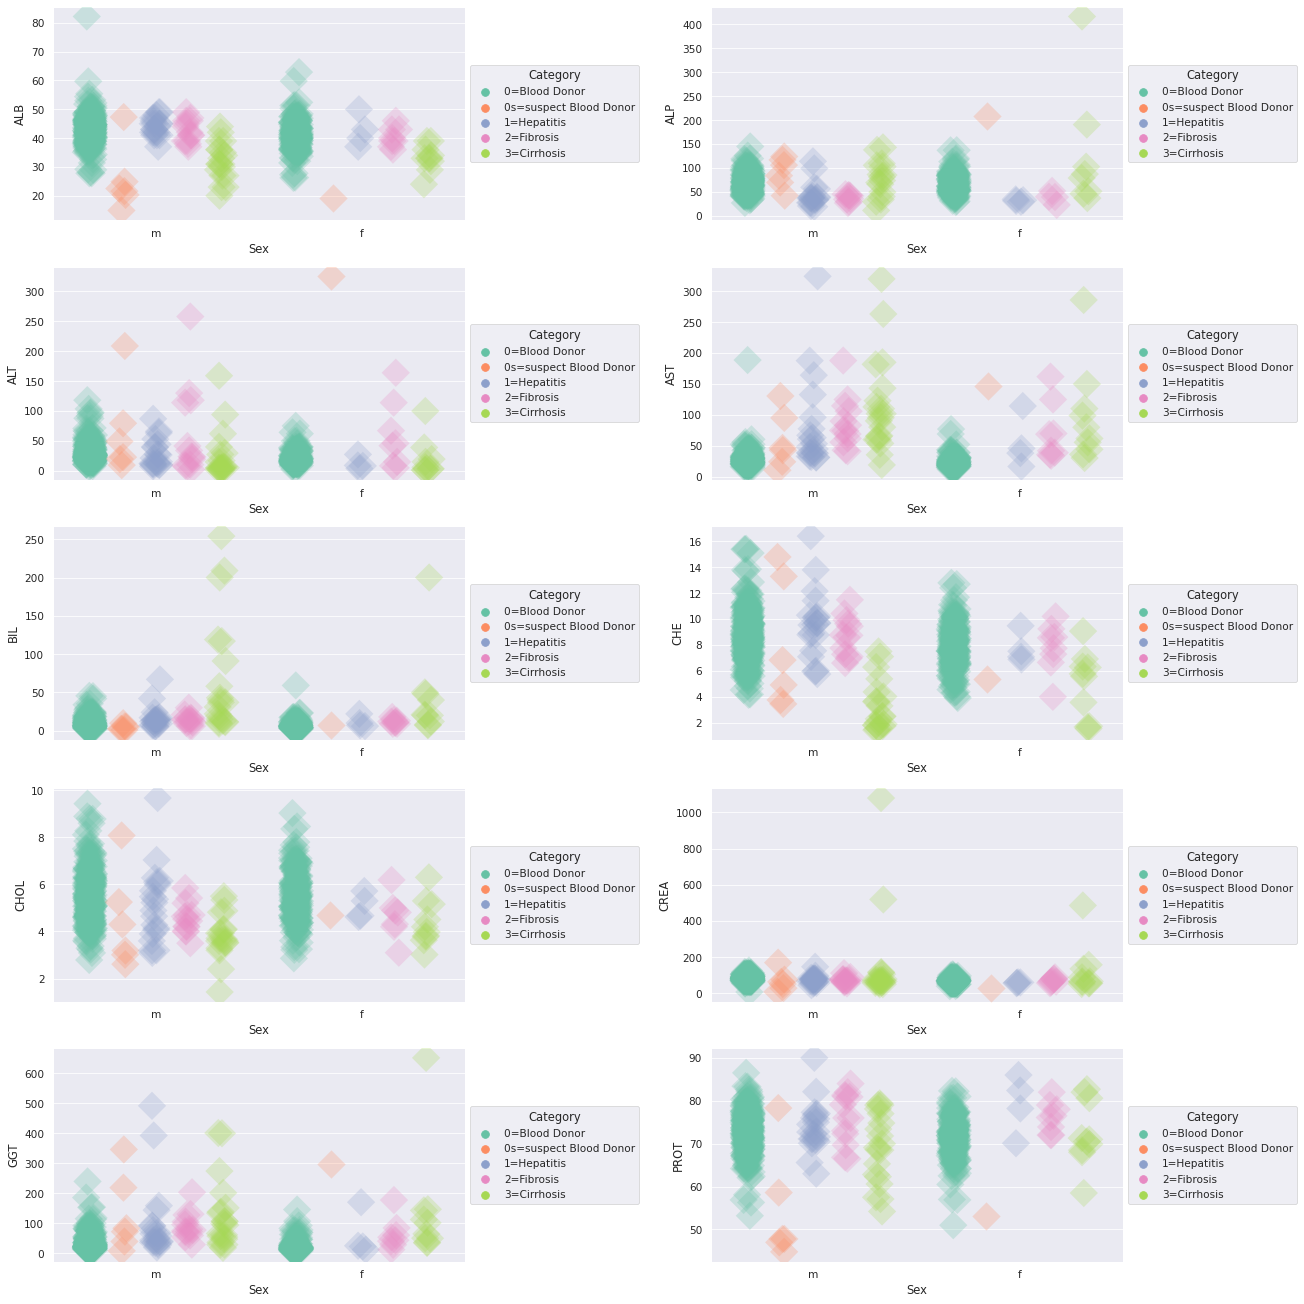

In [46]:
fig, axes = plt.subplots(nrows= 5, ncols= 2, figsize=(18,18), constrained_layout= True)

count_col = 0

count_row = 0

for item in hematological_features:

  if count_col == 2:

    count_col = 0

    count_row += 1
    
    strip = sns.stripplot(x="Sex", y=item, data=hcv_df, hue='Category', palette="Set2", dodge=True, size=20, marker="D", edgecolor="gray", alpha=.25, ax= axes[count_row][count_col])

    sns.move_legend(strip, "center left", bbox_to_anchor=(1, 0.5))

    count_col +=1

  else:

    strip = sns.stripplot(x="Sex", y=item, data=hcv_df, hue='Category', palette="Set2", dodge=True, size=20, marker="D", edgecolor="gray", alpha=.25, ax= axes[count_row][count_col])

    sns.move_legend(strip, "center left", bbox_to_anchor=(1, 0.5))
    
    count_col +=1

From strip plots we can say that extreme values in features usually results in labeling as a hepatitis patient.

**Changing Categorical values to Numeric values**

In [47]:
hcv_demo=hcv_df.copy()

In [48]:
hcv_two_only_input = hcv_demo.drop('Category', axis=1)
hcv_two_only_output = hcv_demo['Category']

hcv_two_only_input["Sex"].replace({"f": 0, "m": 1}, inplace=True)
hcv_two_only_input = hcv_two_only_input.astype({"Sex":int})

hcv_two_only_output.replace({"0=Blood Donor": 0, "0s=suspect Blood Donor": 0,"1=Hepatitis": 1,"2=Fibrosis": 1,"3=Cirrhosis": 1}, inplace=True)
# hcv_two_only_output.replace({" no_disease": 0, "suspect_disease": 1," hepatitis": 2," fibrosis": 3," cirrhosis": 4}, inplace=True)
hcv_two_only_output = hcv_two_only_output.astype({"Category": int})

print(hcv_two_only_input)
print()
hcv_two_only_output

     Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0     32    1  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1     32    1  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2     32    1  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3     32    1  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4     32    1  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
610   62    0  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611   64    0  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612   64    0  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2   
613   46    0  33.0    NaN   39.0   62.0  20.0   3.56  4.20   52.0   50.0   
614   59    0  36.0    NaN  100.0   80.0  12.0   9.07  5.30   67.0   34.0   

     PROT  
0    69.0  
1    76.5  
2    79.3  
3    75.7  
4    68.7  
.. 

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [49]:
hcv_two_only_output.value_counts()

0    540
1     75
Name: Category, dtype: int64

In [50]:
hcv_two_only_input.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,0.613008,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,0.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,1.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


#**Pre Processing**

**Imputation for handling of missing values(Iterative Imputer-MICE and MissForest)**

In [51]:
def miceImpute(df_data_only_input, **kwargs):
  lr= linear_model.LinearRegression()
  
  imp = IterativeImputer(estimator=lr, **kwargs)

  xtrans = imp.fit_transform(df_data_only_input)

  xtrans = pd.DataFrame(xtrans, columns=df_data_only_input.columns)

  return xtrans

In [52]:
mice_inpute = miceImpute(hcv_two_only_input, verbose=2, initial_strategy='mean', random_state = 42, max_iter=20, tol=1e-10)

[IterativeImputer] Completing matrix with shape (615, 12)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.03
[IterativeImputer] Change: 49.51032495394108, scaled tolerance: 1.0790999999999999e-07 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.05
[IterativeImputer] Change: 1.1248998036057527, scaled tolerance: 1.0790999999999999e-07 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.07
[IterativeImputer] Change: 0.07824775820003538, scaled tolerance: 1.0790999999999999e-07 
[IterativeImputer] Ending imputation round 4/20, elapsed time 0.09
[IterativeImputer] Change: 0.00184875906604276, scaled tolerance: 1.0790999999999999e-07 
[IterativeImputer] Ending imputation round 5/20, elapsed time 0.11
[IterativeImputer] Change: 1.982476732109717e-05, scaled tolerance: 1.0790999999999999e-07 
[IterativeImputer] Ending imputation round 6/20, elapsed time 0.14
[IterativeImputer] Change: 5.23440405686415e-07, scaled tolerance: 1.0790999999999999e-07 


In [53]:
def missForestImpute(df_data_only_input, **kwargs):
  imputer = missingpy.MissForest(**kwargs)

  X_missForest = imputer.fit_transform(df_data_only_input)
  
  print(X_missForest)
  
  X_missForest = pd.DataFrame(X_missForest, columns=df_data_only_input.columns)
  
  return X_missForest

In [54]:
missForest_input = missForestImpute(hcv_two_only_input, criterion=('squared_error'), random_state = 42, n_estimators=200, verbose=0)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
[[ 32.    1.   38.5 ... 106.   12.1  69. ]
 [ 32.    1.   38.5 ...  74.   15.6  76.5]
 [ 32.    1.   46.9 ...  86.   33.2  79.3]
 ...
 [ 64.    0.   29.  ...  66.7  64.2  82. ]
 [ 46.    0.   33.  ...  52.   50.   71. ]
 [ 59.    0.   36.  ...  67.   34.   68. ]]


In [55]:
mice_imputed_df = pd.concat([mice_inpute, hcv_two_only_output], axis=1)

mice_imputed_df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,1.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32.0,1.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32.0,1.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32.0,1.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32.0,1.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [56]:
mice_imputed_df.isnull().sum()

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

In [57]:
missForest_imputed_df = pd.concat([missForest_input, hcv_two_only_output], axis=1)

missForest_imputed_df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,1.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32.0,1.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32.0,1.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32.0,1.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32.0,1.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [58]:
missForest_imputed_df.isnull().sum()

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

In [59]:
basic_statistical_info_comparison = pd.DataFrame({'Variables':missForest_imputed_df.drop(['Sex', 'Category'], axis=1).mean().index, 
                                                  
                                                 'Raw_DF_Mean':hcv_demo.drop(['Sex', 'Category'], axis=1).mean().values, 
                                                  
                                                 'MICE_Imputed_DF_Mean':mice_imputed_df.drop(['Sex', 'Category'], axis=1).mean().values,
                                                  
                                                 'MissForest_Imputed_DF_Mean':missForest_imputed_df.drop(['Sex', 'Category'], axis=1).mean().values,
                                                  
                                                 'Raw_DF_STD':hcv_demo.drop(['Sex', 'Category'], axis=1).std().values, 
                                                  
                                                 'MICE_Imputed_DF_STD':mice_imputed_df.drop(['Sex', 'Category'], axis=1).std().values,
                                                  
                                                 'MissForest_Imputed_DF_STD':missForest_imputed_df.drop(['Sex', 'Category'], axis=1).std().values})

In [60]:
basic_statistical_info_comparison

,Variables,Raw_DF_Mean,MICE_Imputed_DF_Mean,MissForest_Imputed_DF_Mean,Raw_DF_STD,MICE_Imputed_DF_STD,MissForest_Imputed_DF_STD
0,Age,47.408130,47.408130,47.408130,10.055105,10.055105,10.055105
1,ALB,41.620195,41.624032,41.617641,5.780629,5.776704,5.776268
2,ALP,68.283920,68.902661,68.251176,26.028315,26.038894,25.663954
3,ALT,28.450814,28.453642,28.469668,25.469689,25.449036,25.453234
4,AST,34.786341,34.786341,34.786341,33.090690,33.090690,33.090690
5,BIL,11.396748,11.396748,11.396748,19.673150,19.673150,19.673150
6,CHE,8.196634,8.196634,8.196634,2.205657,2.205657,2.205657
7,CHOL,5.368099,5.369659,5.369189,1.132728,1.128512,1.127342
8,CREA,81.287805,81.287805,81.287805,49.756166,49.756166,49.756166
9,GGT,39.533171,39.533171,39.533171,54.661071,54.661071,54.661071


#**Visualization After Pre Processing**

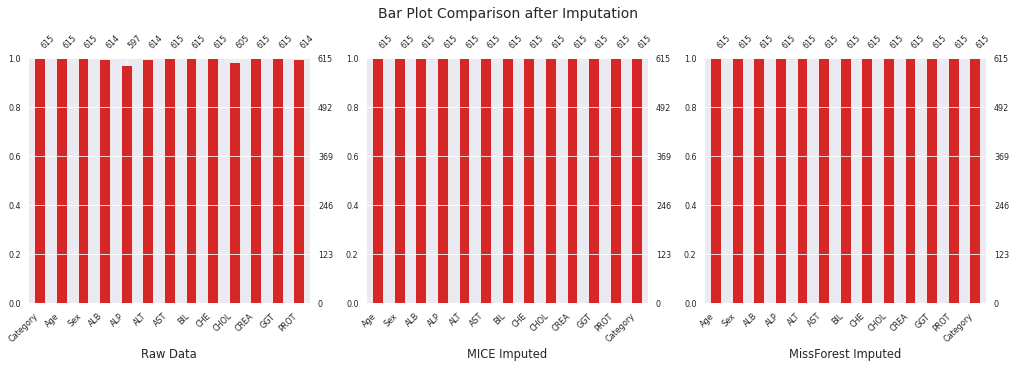

In [61]:
fig, axes = plt.subplots(figsize=[14,5], nrows=1, ncols=3, constrained_layout=True)

fig.suptitle("Bar Plot Comparison after Imputation")

missing_bar_plot_raw = msno.bar(hcv_df, ax=axes[0], color="tab:red", fontsize = 8)

missing_bar_plot_mice = msno.bar(mice_imputed_df, ax=axes[1], color="tab:red", fontsize = 8)

missing_bar_plot_missforest = msno.bar(missForest_imputed_df, ax=axes[2], color="tab:red", fontsize = 8)

missing_bar_plot_raw.set_xlabel('Raw Data')

missing_bar_plot_mice.set_xlabel('MICE Imputed')

missing_bar_plot_missforest.set_xlabel('MissForest Imputed')

plt.show()

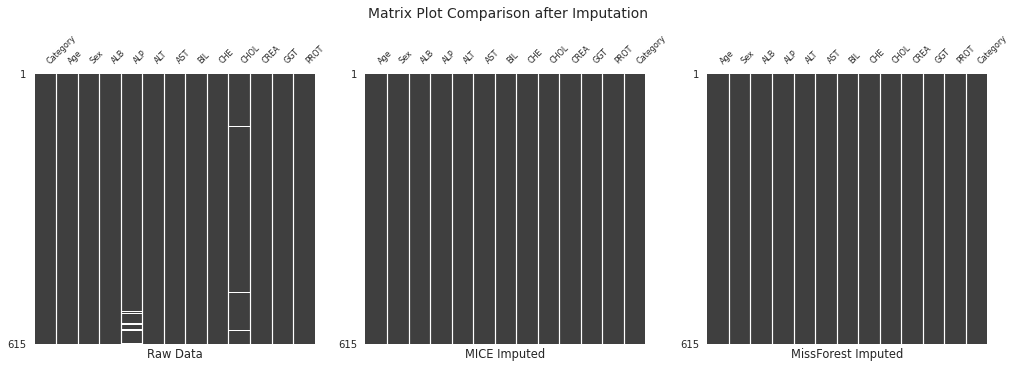

In [62]:
fig, axes = plt.subplots(figsize=[14,5], nrows=1, ncols=3, constrained_layout=True)

fig.suptitle("Matrix Plot Comparison after Imputation")

missing_matrix_plot_raw = msno.matrix(hcv_df, ax=axes[0], sparkline=False, fontsize = 8)

missing_matrix_plot_mice = msno.matrix(mice_imputed_df, ax=axes[1], sparkline=False, fontsize = 8)

missing_matrix_plot_missforest = msno.matrix(missForest_imputed_df, ax=axes[2], sparkline=False, fontsize = 8)

missing_matrix_plot_raw.set_xlabel('Raw Data')

missing_matrix_plot_mice.set_xlabel('MICE Imputed')

missing_matrix_plot_missforest.set_xlabel('MissForest Imputed')

plt.show()

**Scatter Plot**

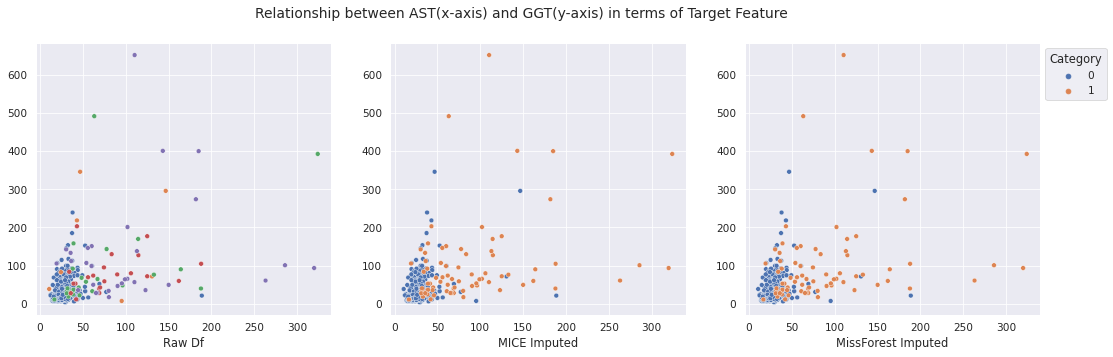

In [63]:
#Watching Scatter plot to see variability between random fachuki

fig, axes = plt.subplots(figsize=[18,5], nrows=1, ncols=3)

fig.suptitle('Relationship between AST(x-axis) and GGT(y-axis) in terms of Target Feature')

sns.set_theme(context='paper', font_scale=1.2)

scatter_raw1 = sns.scatterplot(data=hcv_df, ax=axes[0], x="AST", y="GGT", hue="Category")

scatter_raw1.legend([],[], frameon=False)

scatter_raw1.set_xlabel('Raw Df')

scatter_raw1.set_ylabel('')

scattermice = sns.scatterplot(data=mice_imputed_df, ax=axes[1], x="AST", y="GGT", hue="Category")

scattermice.legend([],[], frameon=False)

scattermice.set_xlabel('MICE Imputed')

scattermice.set_ylabel('')

scattermissforest = sns.scatterplot(data=missForest_imputed_df, ax=axes[2], x="AST", y="GGT", hue="Category")

scattermissforest.set_xlabel('MissForest Imputed')

scattermissforest.set_ylabel('')

# plt.legend(['hola', 'pola'])

sns.move_legend(scattermissforest, "upper left", bbox_to_anchor=(1, 1))

We can see that after imputation, there are no drastic change in distribution in both MICE and MissForest Imputed datasets.

**Boxplot**

In [64]:
boxplot_missForest=missForest_input.copy()
boxplot_mice=mice_inpute.copy()

In [65]:
boxplot_missForest=boxplot_missForest.drop('Sex', axis=1)
boxplot_mice=boxplot_mice.drop('Sex', axis=1)

(-5.0, 500.0)

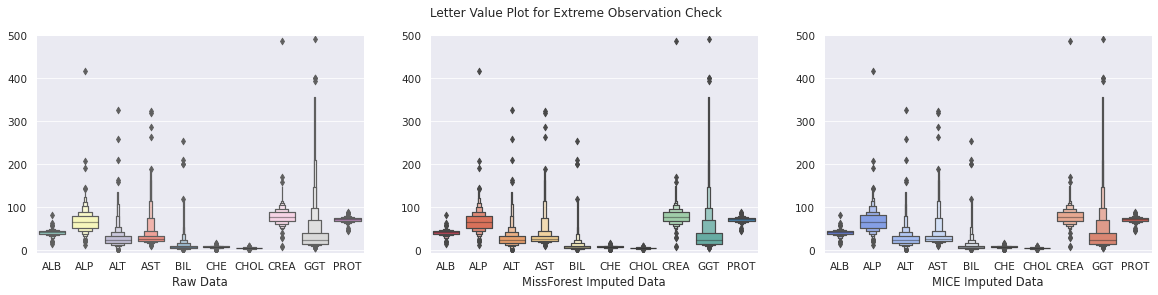

In [66]:
fig, axes = plt.subplots(figsize=(20,4), nrows=1, ncols=3)

fig.suptitle("Letter Value Plot for Extreme Observation Check", fontsize=12)

boxen_raw = sns.boxenplot(data = hcv_df[hematological_features], palette="Set3", ax=axes[0])

boxen_missforest = sns.boxenplot(data = boxplot_missForest[hematological_features], palette="Spectral",  ax=axes[1])

boxen_mice = sns.boxenplot(data = boxplot_mice[hematological_features], palette="coolwarm",  ax=axes[2])

boxen_raw.set_xlabel('Raw Data')

boxen_missforest.set_xlabel('MissForest Imputed Data')

boxen_mice.set_xlabel('MICE Imputed Data')

boxen_raw.set_ylim(-5, 500)

boxen_missforest.set_ylim(-5, 500)

boxen_mice.set_ylim(-5, 500)

We can see there are no difference in extreme value observations after imputation. There are similar number of extreme observations. The reason for these extreme observations can be manual mistakes or machine mistakes.

In [67]:
hcv_two_only_output.value_counts()

0    540
1     75
Name: Category, dtype: int64

#**Statistics**

**Descriptives**

In [68]:
skewness = hcv_demo.drop(['Sex','Category'], axis=1).skew()

kurtosis = hcv_demo.drop(['Sex','Category'], axis=1).kurtosis()

skew_kurt_df = pd.DataFrame({'Variables':skewness.index, 'skewness':skewness.values, 'kurtosis':kurtosis.values})

skew_kurt_df

,Variables,skewness,kurtosis
0,Age,0.267134,-0.386473
1,ALB,-0.176768,5.983301
2,ALP,4.654921,54.972905
3,ALT,5.506114,47.129261
4,AST,4.940327,30.836641
5,BIL,8.385437,83.186732
6,CHE,-0.110233,1.314730
7,CHOL,0.375828,0.694023
8,CREA,15.169291,280.100237
9,GGT,5.632734,43.712579


Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. We can see there are a lot of right skewed variables in the data.<br>We also notice that many variables have a really high kurtosis value, indicating that there might be outliers.

In [69]:
df_raw = hcv_demo.copy()

df_raw = df_raw.dropna()

df_raw.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [70]:
df_raw = df_raw.drop(['Age', 'Sex'], axis=1)

In [71]:
def probability_plot(df,feature):
    print(f'{feature}')

    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)  #1st plot

    plt.title(feature)

    df[feature].hist()

    plt.subplot(1,2,2)  #2nd plot

    stats.probplot(df[feature], dist='norm', plot=pylab)

    plt.tight_layout

    plt.show()

ALB


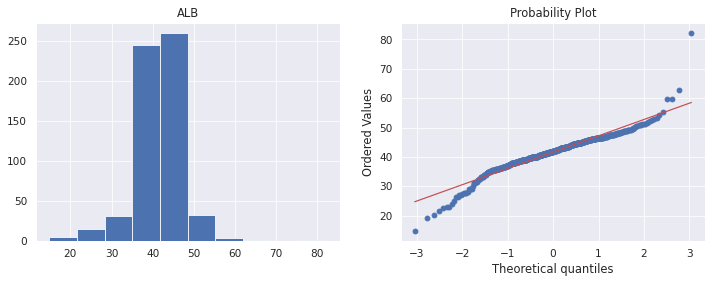

ALP


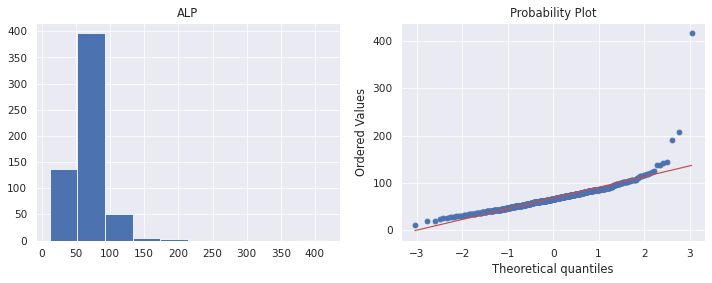

ALT


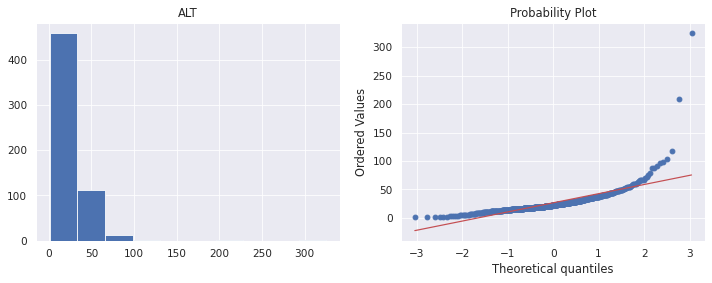

AST


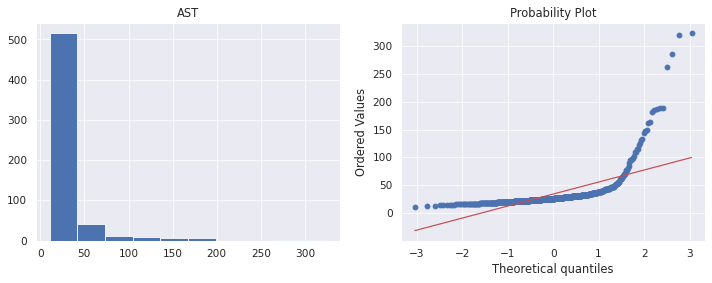

BIL


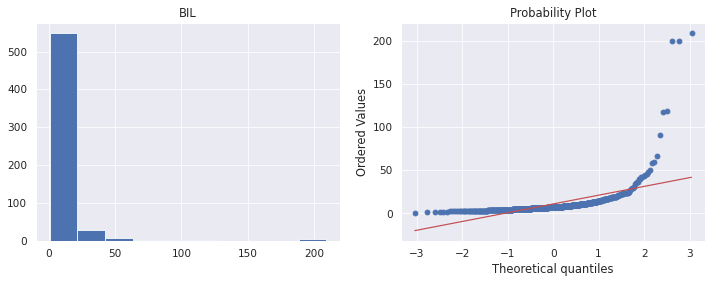

CHE


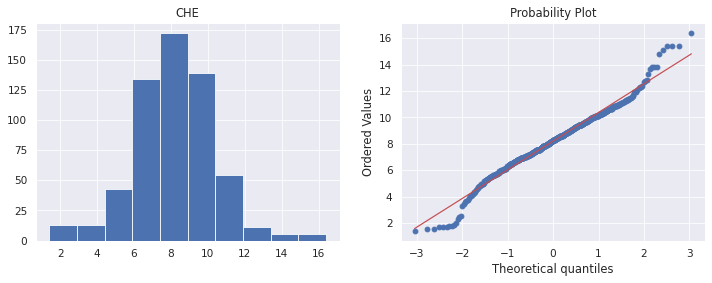

CHOL


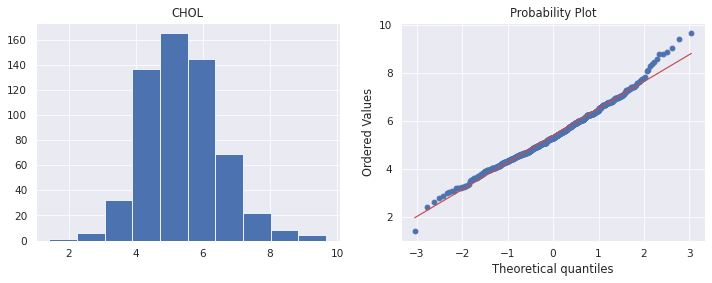

CREA


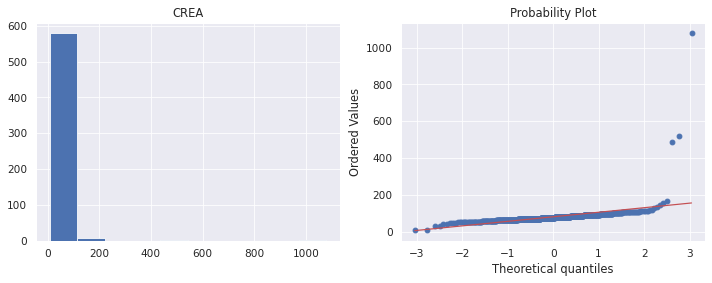

GGT


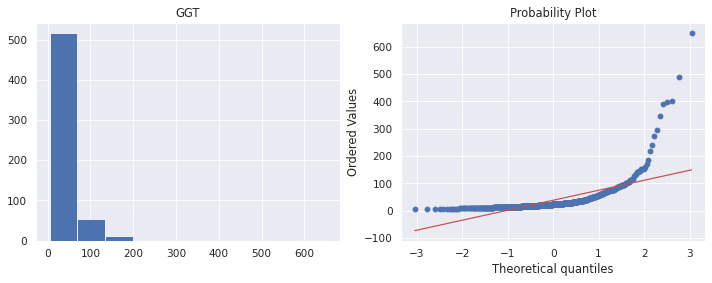

PROT


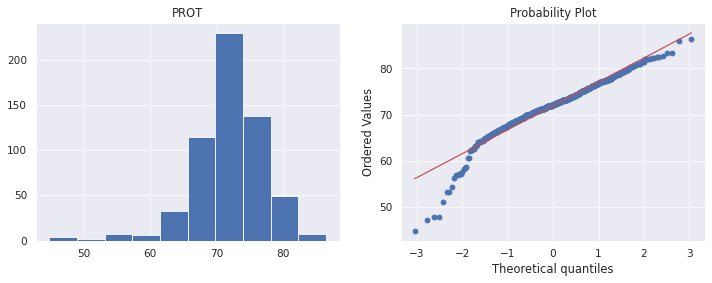

In [72]:
for item in hematological_features:
  probability_plot(df_raw,item)

We can see from Q-Q plot that most of the variables do not seem to follow a normal distribution and some of them have extreme values.

In [73]:
df_raw['AST'],parameters_raw1 = stats.boxcox(df_raw['AST'])
df_raw['ALB'],parameters_raw2 = stats.boxcox(df_raw['ALB'])
df_raw['ALP'],parameters_raw3 = stats.boxcox(df_raw['ALP'])
df_raw['ALT'],parameters_raw4 = stats.boxcox(df_raw['ALT'])
df_raw['BIL'],parameters_raw5 = stats.boxcox(df_raw['BIL'])
df_raw['CHE'],parameters_raw6 = stats.boxcox(df_raw['CHE'])
df_raw['CHOL'],parameters_raw7 = stats.boxcox(df_raw['CHOL'])
df_raw['CREA'],parameters_raw8 = stats.boxcox(df_raw['CREA'])
df_raw['GGT'],parameters_raw9 = stats.boxcox(df_raw['GGT'])
df_raw['PROT'],parameters_raw10 = stats.boxcox(df_raw['PROT'])

ALB


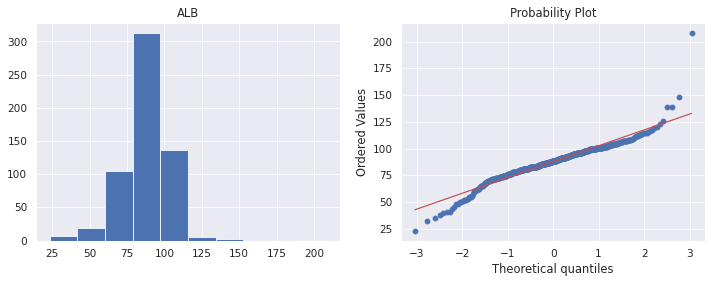

ALP


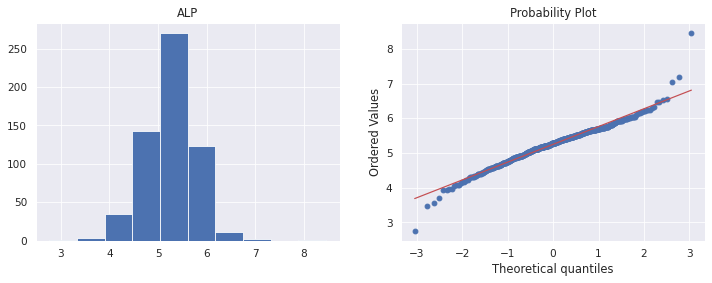

ALT


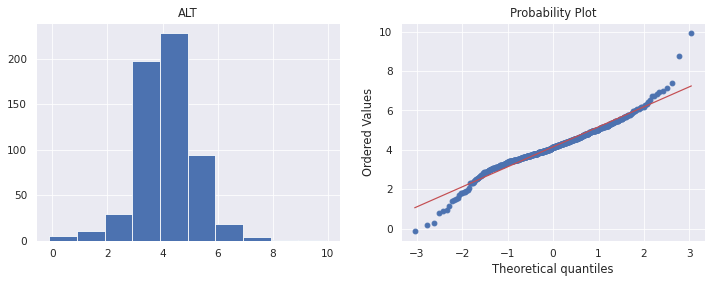

AST


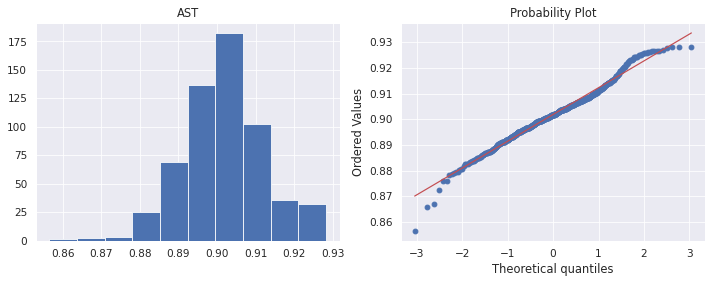

BIL


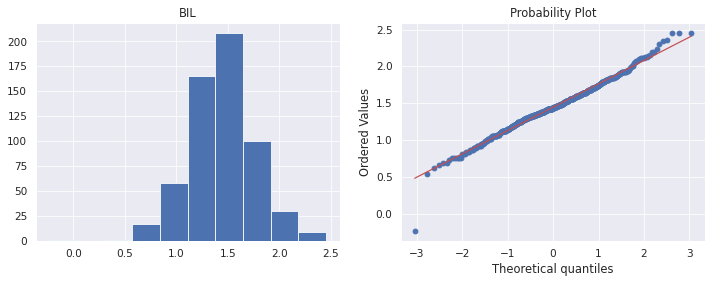

CHE


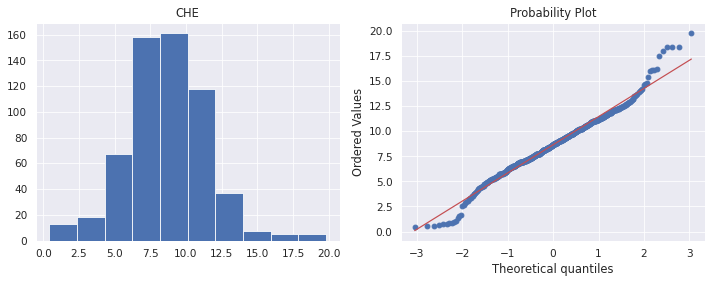

CHOL


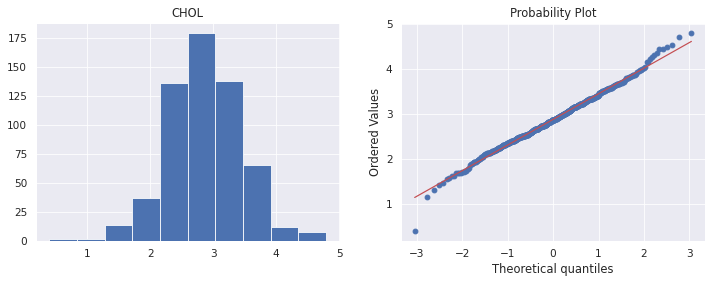

CREA


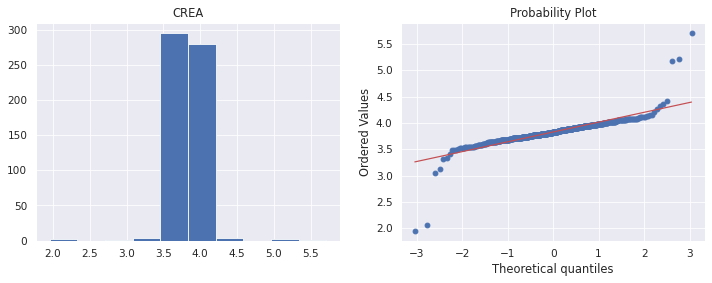

GGT


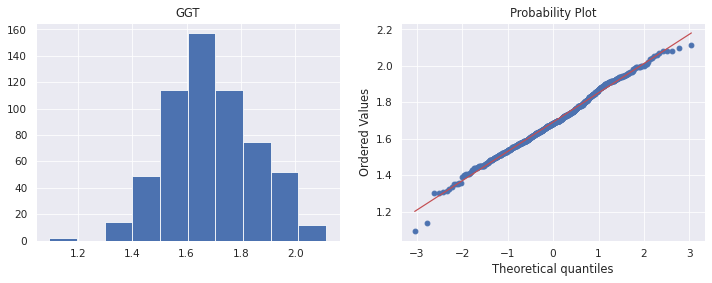

PROT


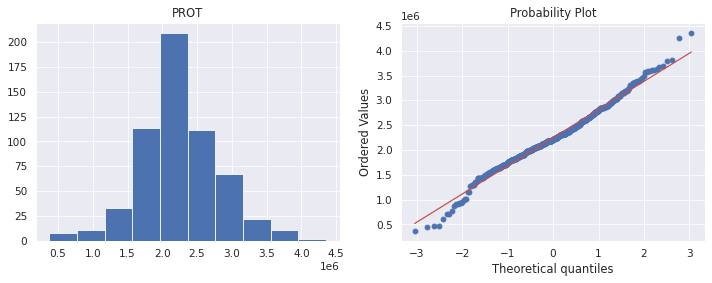

In [74]:
for item in hematological_features:
  probability_plot(df_raw,item)

**Distribution**

In [75]:
def normality_Test(dataset):
  dataset = dataset.dropna()

  data_numpy = dataset.to_numpy()
  
  return stats.normaltest(data_numpy)

In [76]:
def bartletts_sphericity(dataset):
  chi_square_value,p_value = factor_analyzer.calculate_bartlett_sphericity(dataset)
  
  return chi_square_value, p_value

In [77]:
def kmo_test(dataset):
  kmo_all,kmo_model = factor_analyzer.calculate_kmo(dataset)
  
  return kmo_all,kmo_model

In [78]:
print('Normality test values for raw dataset:',normality_Test(df_raw))
print()

print('Bartlett test of Sphericity values for raw dataset:',bartletts_sphericity(df_raw))
print()

print('KMO test values for raw dataset:',kmo_test(df_raw))
print()

Normality test values for raw dataset: NormaltestResult(statistic=array([3.34468625e+02, 1.09072281e+02, 5.24606603e+01, 5.40921780e+01,
       1.01064048e+01, 2.11337960e+01, 2.02614549e+01, 8.33027046e+00,
       1.90745152e+02, 9.27359706e-02, 1.30716278e+01]), pvalue=array([2.34996214e-73, 2.06659339e-24, 4.05800297e-12, 1.79486914e-12,
       6.38884090e-03, 2.57545827e-05, 3.98364812e-05, 1.55276150e-02,
       3.80379060e-42, 9.54690585e-01, 1.45054793e-03]))

Bartlett test of Sphericity values for raw dataset: (1766.7478335909561, 0.0)

KMO test values for raw dataset: (array([0.45775407, 0.61834659, 0.48587296, 0.40120545, 0.49766997,
       0.81859017, 0.77907873, 0.77749492, 0.61122634, 0.5908216 ,
       0.65755682]), 0.5625822675604025)



Here, the normality test tells us that the dataset does not come from a normal distribution. But after imputing missing values, the bartlett's test of sphericity tells us that the dataset is significant(p-value < 0.05), means not an identity matrix and KMO test for both the imputation technique also tells us that it is significant/ adequate dataset.

In [79]:
for var in hematological_features:
  print(f"For {var}:")

  print(stats.anderson(df_raw[var].iloc[100:500]))

  print()

For ALB:
AndersonResult(statistic=3.7512794705315287, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

For ALP:
AndersonResult(statistic=0.3637700459637472, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

For ALT:
AndersonResult(statistic=2.355920258784181, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

For AST:
AndersonResult(statistic=1.536346541288708, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

For BIL:
AndersonResult(statistic=0.36396595393341613, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

For CHE:
AndersonResult(statistic=1.4062582942095787, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=arr

Our null hypothesis is, the data is normally distributed.

We can compare test statistic value to each critical value that corresponds to each significance level to see if the test results are significant. For example:

The critical value of ALB for α = 0.01 is 1.081. Because the test statistic (3.751) is greater than this critical value, the results are significant at a significance level of 0.01.
The critical value of ALB for α = 0.025 is 0.909. Because the test statistic (3.751) is greater than this critical value, the results are significant at a significance level of 0.025.
And so on.

We can see that the test results are significant at most significance level for most of the features, which means we would reject the null hypothesis of the test. Thus, we have sufficient evidence to say that the sample data is not normally distributed.

#**Correlation & Multicollinearity Checking**


**Pearson's Correlation with Heatmap**

In [80]:
mice_imputed_df.corr()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
Age,1.000000,-0.024544,-0.195814,0.184330,-0.006121,0.088666,0.032492,-0.075093,0.125659,-0.022296,0.153087,-0.153151,0.037781
Sex,-0.024544,1.000000,0.146573,-0.015914,0.161873,0.130891,0.111177,0.169111,-0.038066,0.159589,0.133276,0.049484,0.071663
ALB,-0.195814,0.146573,1.000000,-0.150590,0.001973,-0.192984,-0.221565,0.375587,0.217895,-0.001724,-0.154713,0.558037,-0.178051
ALP,0.184330,-0.015914,-0.150590,1.000000,0.253696,0.097286,0.078525,0.019776,0.108974,0.145397,0.471060,-0.036315,0.003388
ALT,-0.006121,0.161873,0.001973,0.253696,1.000000,0.273318,-0.038493,0.147022,0.063000,-0.043032,0.248043,0.091241,0.089024
AST,0.088666,0.130891,-0.192984,0.097286,0.273318,1.000000,0.312231,-0.208536,-0.213560,-0.021387,0.491263,0.034787,0.621724
BIL,0.032492,0.111177,-0.221565,0.078525,-0.038493,0.312231,1.000000,-0.333172,-0.194148,0.031224,0.217024,-0.067576,0.398451
CHE,-0.075093,0.169111,0.375587,0.019776,0.147022,-0.208536,-0.333172,1.000000,0.431906,-0.011157,-0.110345,0.299275,-0.230785
CHOL,0.125659,-0.038066,0.217895,0.108974,0.063000,-0.213560,-0.194148,0.431906,1.000000,-0.050784,-0.011868,0.211734,-0.271496
CREA,-0.022296,0.159589,-0.001724,0.145397,-0.043032,-0.021387,0.031224,-0.011157,-0.050784,1.000000,0.121003,-0.033052,0.136772


In [81]:
def corr_heatmap(dataset, titles=''): 
  plt.figure(figsize = (14,7))

  sns.set_theme(context='paper', style='white', palette='deep')

  plt.title(titles)

  mask = np.triu(np.ones_like(dataset.corr(), dtype=bool))

  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  sns.heatmap(dataset.corr(),annot=True,cmap=cmap,mask=mask)

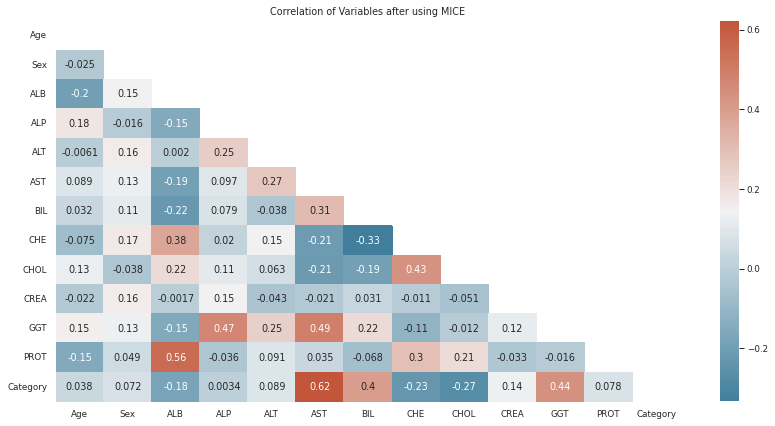

In [82]:
corr_heatmap(mice_imputed_df, 'Correlation of Variables after using MICE')

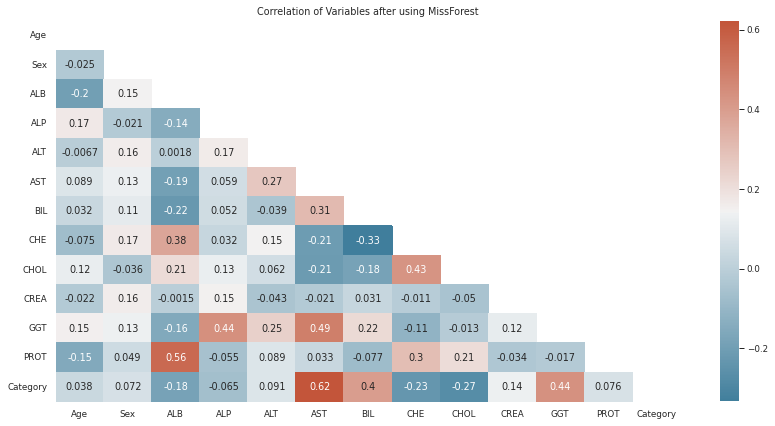

In [83]:
corr_heatmap(missForest_imputed_df, 'Correlation of Variables after using MissForest')

**Multicollinearity**

In [84]:
# compute the vif for all given features
def compute_vif(dataset_df_first, dataset_df_second, considered_features):
    X = dataset_df_first[considered_features].copy()

    Y = dataset_df_second[considered_features].copy()

    # create dataframe to store vif values
    vif = pd.DataFrame()

    vif["Variable"] = X.columns

    vif["VIF_MICE"] = [outliers_influence.variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    vif["VIF_MissForest"] = [outliers_influence.variance_inflation_factor(Y.values, i) for i in range(len(Y.columns))]

    return vif

In [85]:
pre_new_var=['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

new_var=['GGT', 'ALP', 'ALT', 'AST', 'BIL']

In [86]:
compute_vif(mice_imputed_df, missForest_imputed_df, pre_new_var).sort_values('VIF_MICE', ascending=False)

,Variable,VIF_MICE,VIF_MissForest
10,PROT,140.024397,139.070205
1,ALB,89.938099,89.636654
7,CHOL,31.984793,32.002370
6,CHE,22.479924,22.543660
0,Age,21.855344,21.720535
2,ALP,11.492835,10.880962
8,CREA,3.784209,3.785884
4,AST,3.519978,3.509180
3,ALT,2.762827,2.677109
9,GGT,2.671541,2.640096


In [87]:
compute_vif(mice_imputed_df, missForest_imputed_df, new_var).sort_values('VIF_MICE', ascending=False)

,Variable,VIF_MICE,VIF_MissForest
1,ALP,3.286903,3.011853
3,AST,2.866922,2.871188
2,ALT,2.615058,2.479521
0,GGT,2.286531,2.269929
4,BIL,1.516191,1.506606


In [88]:
df_missforest_predictor = missForest_imputed_df.copy()

In [89]:
df_missforest_target = df_missforest_predictor['Category'] 

In [90]:
df_missforest_predictor = df_missforest_predictor.drop('Category', axis=1)

In [91]:
df_mice_predictor = mice_imputed_df.copy()

In [92]:
df_mice_target = df_mice_predictor['Category'] 

In [93]:
df_mice_predictor = df_mice_predictor.drop('Category', axis=1)

#**Feature Importance & Feature Selection**

In [94]:
def featureImportance(predictor, target, titles=''):
  sns.set_theme(context='paper')

  model = ensemble.RandomForestClassifier(random_state=42)

  model.fit(predictor, target)

  print(f"The shape is: {model.feature_importances_.shape}")

  feat_importances = pd.Series(model.feature_importances_, index=predictor.columns)

  clf = feature_selection.SelectFromModel(estimator=ensemble.RandomForestClassifier(random_state=42)).fit(predictor, target)

  X_new = clf.transform(predictor)

  print(X_new.shape )

  plt.title(titles)

  return feat_importances.nlargest(15).plot(kind='barh', color='r'), feat_importances

The shape is: (12,)
(615, 4)


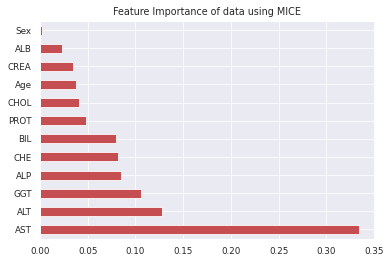

In [95]:
mice_feat_importance_plot, mice_feat_importance = featureImportance(df_mice_predictor, df_mice_target,'Feature Importance of data using MICE')

The shape is: (12,)
(615, 4)


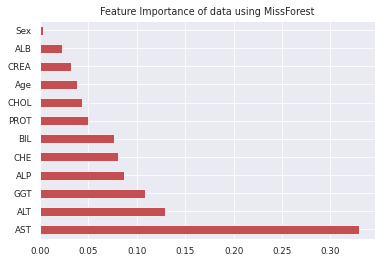

In [96]:
missforest_feat_importance_plot, missforest_feat_importance = featureImportance(df_missforest_predictor, df_missforest_target, 
                                                                                'Feature Importance of data using MissForest')

In [97]:
rfe_mod = ensemble.ExtraTreesClassifier()

rfe = feature_selection.RFE(rfe_mod,n_features_to_select=5, step=1)

fit_rfe = rfe.fit(df_missforest_predictor, df_missforest_target)

print(f"Num Features: {fit_rfe.n_features_}")

print(f"Selected Features: {fit_rfe.support_}")

print(f"Feature Ranking: {fit_rfe.ranking_}")

Num Features: 5
Selected Features: [False False False  True  True  True  True False False False  True False]
Feature Ranking: [7 8 6 1 1 1 1 2 5 3 1 4]


In [98]:
feat_importance_comparison = pd.DataFrame({"Features": mice_feat_importance.index, 
                                           
                                           "Importance% of MICE_df": mice_feat_importance.values*100, 

                                           "Importance% of MissForest_df": missforest_feat_importance.values*100,
                                           
                                           "Selected_by_RFE": fit_rfe.support_})

In [99]:
feat_importance_comparison

,Features,Importance% of MICE_df,Importance% of MissForest_df,Selected_by_RFE
0,Age,3.739862,3.804882,False
1,Sex,0.248680,0.282146,False
2,ALB,2.328031,2.239931,False
3,ALP,8.440734,8.711602,True
4,ALT,12.770949,12.887889,True
5,AST,33.391208,32.943828,True
6,BIL,7.932497,7.641219,True
7,CHE,8.213410,8.102146,False
8,CHOL,4.075872,4.354860,False
9,CREA,3.434964,3.210800,False


In [100]:
feat_importance_comparison.groupby(['Selected_by_RFE'], dropna=False).sum()

,Importance% of MICE_df,Importance% of MissForest_df
Selected_by_RFE,,
False,26.890255,26.932027
True,73.109745,73.067973


Feature selection from MICE imputed set 

In [101]:
mice_predictor_df = df_mice_predictor.drop([ 'Age', 'Sex', 'ALB', 'CHE', 'CHOL', 'CREA', 'PROT'], axis=1)

mice_target_df = df_mice_target.copy() 

Feature Selection from MissForest imputed set

In [102]:
missforest_predictor_df = df_missforest_predictor.drop([ 'Age', 'Sex', 'ALB', 'CHE', 'CHOL', 'CREA', 'PROT'], axis=1)

missforest_target_df = df_missforest_target.copy()


#**Train Test Split**

In [103]:
def scalingMinMax(traindf, testdf):
  scaler = preprocessing.RobustScaler(quantile_range=(2.5, 97.5))

  feature_names = traindf.columns

  scaler.fit(traindf)

  df = scaler.transform(traindf)

  testdata = scaler.transform(testdf)

  df_train = pd.DataFrame(df, columns=feature_names)

  df_test = pd.DataFrame(testdata, columns=testdf.columns)
  
  return df_train, df_test

Train-Test_split for MICE imputed set

In [104]:
X_train_mice, X_test_mice, y_train_mice, y_test_mice = model_selection.train_test_split(mice_predictor_df, mice_target_df,
                                                                                test_size=0.20, random_state=42, stratify=mice_target_df)

In [105]:
X_train_mice, X_test_mice = scalingMinMax(X_train_mice, X_test_mice)

Train-Test-Split for MissForest imputed set

In [106]:
X_train_missforest, X_test_missforest, y_train_missforest, y_test_missforest = model_selection.train_test_split(missforest_predictor_df, missforest_target_df,
                                                                                test_size=0.20, random_state=42, stratify=missforest_target_df)

In [107]:
X_train_missforest, X_test_missforest = scalingMinMax(X_train_missforest, X_test_missforest)

**Initial Classifier**

In [108]:
def initial_RF(x_train, y_train, x_test, y_test):
  train_scores, test_scores = [], []
  values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
  for i in values:
	# configure the model
	  model = ensemble.RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	  model.fit(x_train, y_train)
	# evaluate on the train dataset
	  train_yhat = model.predict(x_train)
	  train_acc = metrics.accuracy_score(y_train, train_yhat)
	  train_scores.append(train_acc)
	# evaluate on the test dataset
	  test_yhat = model.predict(x_test)
	  test_acc = metrics.accuracy_score(y_test, test_yhat)
	  test_scores.append(test_acc)
	# summarize progress
	  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
  plt.plot(values, train_scores, '-o', label='Train')
  plt.plot(values, test_scores, '-o', label='Test')
  plt.legend()
  plt.show()

>1, train: 0.925, test: 0.919
>2, train: 0.965, test: 0.943
>3, train: 0.980, test: 0.951
>4, train: 0.990, test: 0.967
>5, train: 0.992, test: 0.984
>6, train: 0.992, test: 0.959
>7, train: 0.994, test: 0.967
>8, train: 0.998, test: 0.976
>9, train: 1.000, test: 0.976
>10, train: 1.000, test: 0.976
>11, train: 1.000, test: 0.976
>12, train: 1.000, test: 0.976
>13, train: 1.000, test: 0.976
>14, train: 1.000, test: 0.967
>15, train: 1.000, test: 0.976
>16, train: 1.000, test: 0.967
>17, train: 1.000, test: 0.976
>18, train: 1.000, test: 0.976
>19, train: 1.000, test: 0.967
>20, train: 1.000, test: 0.984


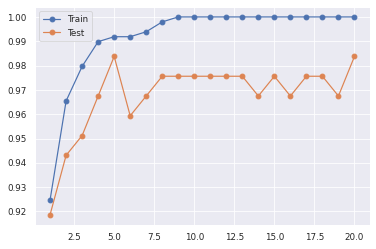

In [109]:
initial_RF(X_train_mice, y_train_mice, X_test_mice, y_test_mice)

We can see from the graph that the model overfits.

#**Oversampling To Handle Overfitting**


**SMOTE for training data**

In [110]:
def smoteForOverfitting(df_input, df_output):
  counter = collections.Counter(df_output)

  print(counter)

  oversample = over_sampling.SMOTE(random_state = 42)

  x_oversampled, y_oversampled = oversample.fit_resample(df_input, df_output)

  countertwo = collections.Counter(y_oversampled)

  print(countertwo)

  return x_oversampled, y_oversampled

In [111]:
smote_mice_predictor, smote_mice_target= smoteForOverfitting(X_train_mice, y_train_mice)

Counter({0: 432, 1: 60})
Counter({0: 432, 1: 432})


In [112]:
smote_mice_predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALP     864 non-null    float64
 1   ALT     864 non-null    float64
 2   AST     864 non-null    float64
 3   BIL     864 non-null    float64
 4   GGT     864 non-null    float64
dtypes: float64(5)
memory usage: 33.9 KB


In [113]:
smote_missforest_predictor, smote_missforest_target = smoteForOverfitting(X_train_missforest, y_train_missforest)

Counter({0: 432, 1: 60})
Counter({0: 432, 1: 432})


In [114]:
smote_missforest_predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALP     864 non-null    float64
 1   ALT     864 non-null    float64
 2   AST     864 non-null    float64
 3   BIL     864 non-null    float64
 4   GGT     864 non-null    float64
dtypes: float64(5)
memory usage: 33.9 KB


**SMOTE full set visualization**

**Parallel Coordinate Plot For Comparison of Numerical Features in terms of Target Feature**

In [116]:
smote_missforest_full = pd.concat([smote_missforest_predictor, smote_missforest_target], axis=1)

smote_mice_full = pd.concat([smote_mice_predictor, smote_mice_target], axis=1)

In [364]:
def scalingMinMaxraw(rawdf):
  scaler = preprocessing.RobustScaler(quantile_range=(2.5, 97.5))

  feature_names = rawdf.columns

  scaler.fit(rawdf)

  df = scaler.transform(rawdf)

  df_raw = pd.DataFrame(df, columns=feature_names)
  
  return df_raw

In [117]:
parallel_smote_missforest = smote_missforest_full.copy()

parallel_smote_mice = smote_mice_full.copy()

parallel_raw = hcv_demo[['ALP', 'ALT', 'AST', 'BIL', 'GGT', 'Category']].copy()

In [373]:
parallel_raw_scaled = scalingMinMaxraw(parallel_raw[['ALP', 'ALT', 'AST', 'BIL', 'GGT']])

parallel_raw_scaled = pd.concat([parallel_raw_scaled, parallel_raw['Category']],axis=1)

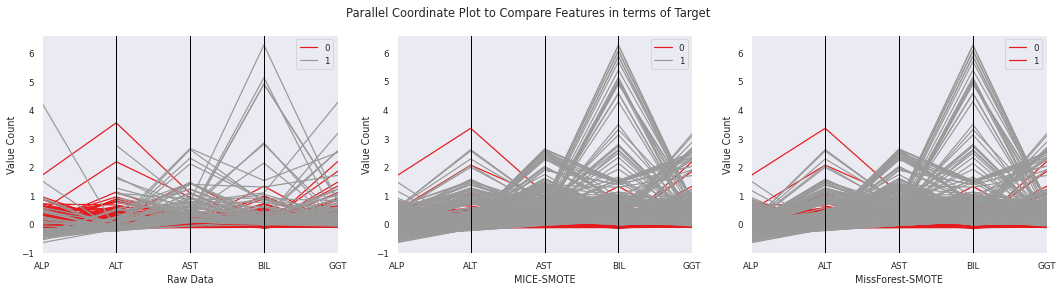

In [375]:
fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=3)

fig.suptitle("Parallel Coordinate Plot to Compare Features in terms of Target")

parallel_plot_raw = pd.plotting.parallel_coordinates(parallel_raw_scaled, 'Category', ax=axes[0], colormap=plt.get_cmap("Set1"))

parallel_plot_mice_smote = pd.plotting.parallel_coordinates(parallel_smote_mice, 'Category', ax=axes[1], colormap=plt.get_cmap("Set1"))

parallel_plot_missforest_smote = pd.plotting.parallel_coordinates(parallel_smote_missforest, 'Category', ax=axes[2], colormap=plt.get_cmap("Set1"))

parallel_plot_raw.set_xlabel("Raw Data")

parallel_plot_raw.set_ylabel("Value Count")

plt.legend(['0','1'])

parallel_plot_mice_smote.set_xlabel("MICE-SMOTE")

parallel_plot_mice_smote.set_ylabel("Value Count")

parallel_plot_missforest_smote.set_xlabel("MissForest-SMOTE")

parallel_plot_missforest_smote.set_ylabel("Value Count")

plt.show()

We can see the differences after SMOTE in the datasets, some of the points were given importance differently in different datasets.

**Sankey Plot to visualize the mean distribution for different Categories**

In [119]:
hematological_features_smote = ['ALP', 'ALT', 'AST', 'BIL', 'GGT']

In [120]:
feature_mean_list_smote = []

for item in hematological_features_smote:
  feature_mean_list_smote.append(list(smote_missforest_full.groupby(by='Category')[item].mean().values))

In [121]:
label_list_smote = ['ALP', 'ALT', 'AST', 'BIL', 'GGT',
              'No Disease', 'Disease']
              
#'ALB':0, 'ALP':1, 'ALT':2, 'AST':3,'BIL':4, 'CHE':5, 'CHOL':6, 'CREA':7, 'GGT':8, 
#'PROT':9, 'No Disease':10, 'Suspect':11, 'Hepatitis':12,'Fibrosis':13,'Cirrhosis':14

In [122]:
#defines how many links will generate for each source

source_smote = []

for index, item in enumerate(feature_mean_list_smote):

  for inner_item in item:

    source_smote.append(index)

In [123]:
#defines which link will hit/reach which target

target_smote = []

for item in feature_mean_list_smote:
  
  for i in range(5, 7):
  
    target_smote.append(i)

In [124]:
#defines the width/value of links

link_value_smote = [inner_item for item in feature_mean_list_smote for inner_item in item ]

In [125]:
fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list_smote},
    link = {"source": source_smote, "target": target_smote, "value": link_value_smote}
    )])

fig.show()

It's noticeable that links connected to DIsease category have more durability than we think.

In [126]:
smote_mice_full = pd.concat([smote_mice_predictor, smote_missforest_target], axis=1)

In [127]:
feature_mean_list_smote = []

for item in hematological_features_smote:
  feature_mean_list_smote.append(list(smote_mice_full.groupby(by='Category')[item].mean().values))

In [128]:
label_list_smote = ['ALP', 'ALT', 'AST', 'BIL', 'GGT',
              'No Disease', 'Disease']
              
#'ALB':0, 'ALP':1, 'ALT':2, 'AST':3,'BIL':4, 'CHE':5, 'CHOL':6, 'CREA':7, 'GGT':8, 
#'PROT':9, 'No Disease':10, 'Suspect':11, 'Hepatitis':12,'Fibrosis':13,'Cirrhosis':14

In [129]:
#defines how many links will generate for each source

source_smote = []

for index, item in enumerate(feature_mean_list_smote):

  for inner_item in item:

    source_smote.append(index)

In [130]:
#defines which link will hit/reach which target

target_smote = []

for item in feature_mean_list_smote:
  
  for i in range(5, 7):
  
    target_smote.append(i)

In [131]:
#defines the width/value of links

link_value_smote = [inner_item for item in feature_mean_list_smote for inner_item in item ]

In [132]:
fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list_smote},
    link = {"source": source_smote, "target": target_smote, "value": link_value_smote}
    )])

fig.show()

We notice that the mean for 'Disease' in features are higher/lower by a lot than the mean for 'No Disease'. 

**Scatter Plot to compare between features**

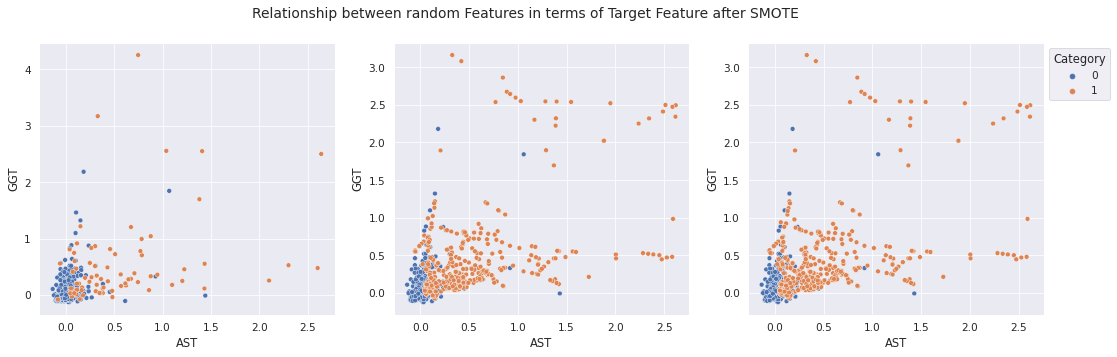

In [378]:
fig, axes = plt.subplots(figsize=[18,5], nrows=1, ncols=3)

fig.suptitle('Relationship between random Features in terms of Target Feature after SMOTE')

sns.set_theme(context='paper', font_scale=1.2)

scatter_raw = sns.scatterplot(data=parallel_raw_scaled, ax=axes[0], x="AST", y="GGT", hue="Category")

scatter_raw.legend([],[], frameon=False)

scatter_mice_smote = sns.scatterplot(data=smote_missforest_full, ax=axes[1], x="AST", y="GGT", hue="Category")

scatter_mice_smote.legend([],[], frameon=False)

scatter_missforest_smote = sns.scatterplot(data=smote_mice_full, ax=axes[2], x="AST", y="GGT", hue="Category")

sns.move_legend(scatter_missforest_smote, "upper left", bbox_to_anchor=(1, 1))

We can see after SMOTE, the dataset is now balanced across features.

#**Hyper Parameter Tuning For TREES**

In [160]:
# Number of trees in random forest
n_estimators = [32, 36, 48, 56, 60]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [42, 51, 60, 72, 75]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [False]

In [161]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [162]:
randomforest = ensemble.RandomForestClassifier()

In [163]:
extratrees = ensemble.ExtraTreesClassifier()

In [164]:
def treeHPTune(estimator_model, cv, n_iter, predictor, target):
  # model = model_selection.RandomizedSearchCV(estimator = estimator_model,param_distributions = random_grid, 
                                             
  #                                            n_iter = n_iter, cv = cv, verbose=2,  n_jobs = -1)


  model = model_selection.GridSearchCV(estimator = estimator_model, param_grid = random_grid, 
                                             
                                              cv = cv, verbose=2,  n_jobs = -1, scoring='accuracy')
  
  model.fit(predictor, target)
  
  return model.best_params_

In [165]:
params_randomforest_missforest = treeHPTune(estimator_model = randomforest, 
                                            
                                            cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2), 
                                            
                                            n_iter = 200, predictor = smote_missforest_predictor, target = smote_missforest_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [166]:
params_randomforest_missforest

{'bootstrap': False,
 'max_depth': 51,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 36}

In [167]:
# 1/0

In [168]:
params_randomforest_mice = treeHPTune(estimator_model = randomforest, 
                                      
                                      cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2),
                                      
                                      n_iter = 200, predictor = smote_mice_predictor, target = smote_mice_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [169]:
params_randomforest_mice

{'bootstrap': False,
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 48}

In [170]:
params_extratrees_mice = treeHPTune(estimator_model = extratrees, 
                                    
                                    cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2), 
                                    
                                    n_iter = 200,  predictor = smote_mice_predictor, target = smote_mice_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [171]:
params_extratrees_mice

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [172]:
params_extratrees_missforest = treeHPTune(estimator_model = extratrees, 
                                          
                                          cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2), 
                                          
                                          n_iter = 200, predictor = smote_missforest_predictor, target = smote_missforest_target)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [173]:
params_extratrees_missforest

{'bootstrap': False,
 'max_depth': 42,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 60}

In [174]:
best_ETC = {'bootstrap': False,
 'max_depth': 42,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}

bst_ETC = {'bootstrap': False,
 'max_depth': 72,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 32}

best_etc = {'bootstrap': False,
 'max_depth': 57,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 36}

#**Training Model**

In [175]:
model_accuracy_score = []

##**Random Forest Classifier**

In [176]:
def rf_model(x_train, y_train, params):
  model = ensemble.RandomForestClassifier(**params, random_state=42)

  model.fit(x_train, y_train)
  
  return model

For SMOTE+ITERATIVE IMPUTER

In [177]:
mice_rf = rf_model(smote_mice_predictor, smote_mice_target, params_randomforest_mice)

model_accuracy_score.append(mice_rf.score(X_test_mice, y_test_mice))

mice_rf.score(X_test_mice, y_test_mice)

0.9512195121951219

For SMOTE+MissForest

In [178]:
missforest_rf = rf_model(smote_missforest_predictor, smote_missforest_target, params_randomforest_missforest)

model_accuracy_score.append(missforest_rf.score(X_test_missforest, y_test_missforest))

missforest_rf.score(X_test_missforest, y_test_missforest)

0.983739837398374

##**Extra Tree Classifier**

In [179]:
def ef_model(x_train, y_train, params):
  model = ensemble.ExtraTreesClassifier(**params, random_state=42)

  model.fit(x_train, y_train)
  
  return model

For SMOTE+ITERATIVE IMPUTER

In [180]:
mice_etc = ef_model(smote_mice_predictor, smote_mice_target, params_extratrees_mice)

model_accuracy_score.append(mice_etc.score(X_test_mice, y_test_mice))

mice_etc.score(X_test_mice, y_test_mice)

0.983739837398374

For SMOTE+MissForest

In [181]:
missforest_etc = ef_model(smote_missforest_predictor, smote_missforest_target, params_extratrees_missforest)

model_accuracy_score.append(missforest_etc.score(X_test_missforest, y_test_missforest))

missforest_etc.score(X_test_missforest, y_test_missforest)

0.991869918699187

##**Multilayer Perceptron**

In [182]:
parameter_space = {
    'hidden_layer_sizes': [(100, 200, 100), (50,100,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['invscaling', 'adaptive'],
    'max_iter': [500, 1000],
    'warm_start': [True, False]
}

In [183]:
def mlp_Cl(predictor, target):
  kf = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

  mlp = neural_network.MLPClassifier(random_state=42)

  clf = model_selection.RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf, verbose=2)

  # clf = model_selection.GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf, verbose=2)
  
  clf_fitted = clf.fit(predictor, target)
  
  return clf_fitted, clf_fitted.best_params_

Multilayer Perceptron+Mice

In [184]:
mlp_model_mice, mlp_param_mice = mlp_Cl(smote_mice_predictor, smote_mice_target)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [185]:
model_accuracy_score.append(mlp_model_mice.score(X_test_mice, y_test_mice))

mlp_model_mice.score(X_test_mice, y_test_mice)

0.975609756097561

Multilayer Perceptron+MissForest

In [186]:
mlp_model_missforest, mlp_param_missforest = mlp_Cl(smote_missforest_predictor, smote_missforest_target)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [187]:
mlp_param_missforest

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'invscaling',
 'max_iter': 1000,
 'solver': 'adam',
 'warm_start': False}

In [188]:
model_accuracy_score.append(mlp_model_missforest.score(X_test_missforest, y_test_missforest))

mlp_model_missforest.score(X_test_missforest, y_test_missforest)

0.967479674796748

##**SVM Classifier**

**Hyperparameter Tuning**

In [189]:
# defining parameter range
param_gridS = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly'],
              'degree':[1],
              'decision_function_shape':['ovo', 'ovr']}
 
def svmParam(predictor, target, param_gridS):
  kf = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

  grid = model_selection.GridSearchCV(svm.SVC(), param_grid=param_gridS, cv=kf, verbose = 1)

  # fitting the model for grid search
  grid.fit(predictor,target)
  
  return grid.best_params_

In [190]:
svm_params_missforest = svmParam(smote_missforest_predictor, smote_missforest_target, param_gridS)

print(svm_params_missforest)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 10, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


In [191]:
svm_params_mice = svmParam(smote_mice_predictor, smote_mice_target, param_gridS)

print(svm_params_mice)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 10, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


**Model SVM**

In [192]:
def svm_model(x_train, y_train, params):
  svm_mod = svm.SVC(**params)

  model = calibration.CalibratedClassifierCV(svm_mod)

   
  model.fit(x_train, y_train)
  
  return model

SVM+Mice

In [193]:
mice_svm = svm_model(smote_mice_predictor, smote_mice_target, svm_params_mice)

model_accuracy_score.append(mice_svm.score(X_test_mice, y_test_mice))

mice_svm.score(X_test_mice, y_test_mice)

0.9512195121951219

SVM+MissForest

In [541]:
missforest_svm = svm_model(smote_missforest_predictor, smote_missforest_target, svm_params_missforest)

model_accuracy_score.append(missforest_svm.score(X_test_missforest, y_test_missforest))

missforest_svm.score(X_test_missforest, y_test_missforest)

0.959349593495935

##**KNeighbors Classifier**

**Hyperparameter tuning**

In [195]:
grid_paramsKn = { 'n_neighbors' : [5,7,9,11,13,15,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski', 'manhattan'],
               'algorithm':['auto', 'kd_tree'],
               'leaf_size':[10,15,20,25,40,50]}

In [196]:
def knn_param(predictor, target, grid_paramsKn):
  kf = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

  gs = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=grid_paramsKn, verbose = 1, cv=kf, n_jobs = -1)

  gs_knn = gs.fit(predictor, target)
  
  return gs_knn.best_params_

In [197]:
kn_params_mice = knn_param(smote_mice_predictor, smote_mice_target, grid_paramsKn)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


In [198]:
kn_params_missforest = knn_param(smote_missforest_predictor, smote_missforest_target, grid_paramsKn)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


**Model KNeighborsClassifier**

In [199]:
def knn_model(x_train, y_train, params):
  model = neighbors.KNeighborsClassifier(**params)

  model.fit(x_train, y_train)
  
  return model

KNN+MICE

In [200]:
mice_knn = knn_model(smote_mice_predictor, smote_mice_target, kn_params_mice)

model_accuracy_score.append(mice_knn.score(X_test_mice, y_test_mice))

mice_knn.score(X_test_mice, y_test_mice)

0.9349593495934959

KNN+MissForest

In [201]:
missforest_knn = knn_model(smote_missforest_predictor, smote_missforest_target, kn_params_missforest)

model_accuracy_score.append(missforest_knn.score(X_test_missforest, y_test_missforest))

missforest_knn.score(X_test_missforest, y_test_missforest)

0.9512195121951219

In [202]:
model_accuracy_score

[0.9512195121951219,
 0.983739837398374,
 0.983739837398374,
 0.991869918699187,
 0.975609756097561,
 0.967479674796748,
 0.9512195121951219,
 0.959349593495935,
 0.9349593495934959,
 0.9512195121951219]

#**Model Evaluation and Comparison**

In [206]:
nested_cv_acc_list = []

norm_cv_acc_list = []

##K-Fold Cross Validation

In [207]:
def kfold_valid(predictor, target, classifier, splits, nested=True, params=None):
  kf = model_selection.StratifiedShuffleSplit(n_splits=splits, test_size=0.2, random_state=42)

  kf_gridSearch = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2)

  fold = 0

  score_kfold = []

  for train_index, test_index in kf.split(predictor,target):
    
    fold+=1

    X_train = predictor.iloc[train_index]

    y_train = target[train_index]  

    X_test = predictor.iloc[test_index]

    y_test = target[test_index]  

    X_train, X_test = scalingMinMax(X_train, X_test)

    smot = over_sampling.SMOTE()

    X_train_oversampled, y_train_oversampled = smot.fit_resample(X_train, y_train)

    if nested:
      
      if classifier=='rf':
        
        model = ensemble.RandomForestClassifier(**treeHPTune(ensemble.RandomForestClassifier(), kf_gridSearch, 200, X_train_oversampled, y_train_oversampled)) 

      elif classifier=='etc':
        
        model = ensemble.ExtraTreesClassifier(**treeHPTune(ensemble.ExtraTreesClassifier(), kf_gridSearch, 200, X_train_oversampled, y_train_oversampled))

      elif classifier=='svm':
        
        svm_= svm.SVC(**svmParam(X_train_oversampled, y_train_oversampled, param_gridS))
        
        model = calibration.CalibratedClassifierCV(svm_)

      elif classifier=='knn':
        
        model = neighbors.KNeighborsClassifier(**knn_param(X_train_oversampled, y_train_oversampled, grid_paramsKn))

      elif classifier=='mlp':
        
        mlp_model, mlpparam_= mlp_Cl(X_train_oversampled, y_train_oversampled)
        
        model = neural_network.MLPClassifier(**mlpparam_)

    elif not nested:
      
      if classifier=='rf':
        
        model = ensemble.RandomForestClassifier(**params) 

      elif classifier=='etc':
        
        model = ensemble.ExtraTreesClassifier(**params)

      elif classifier=='svm':

        svm_= svm.SVC(**params)

        model = calibration.CalibratedClassifierCV(svm_)

      elif classifier=='knn':

        model = neighbors.KNeighborsClassifier(**params)

      elif classifier=='mlp':

        model = neural_network.MLPClassifier(**params)

    model.fit(X_train_oversampled, y_train_oversampled ) 

    y_pred = model.predict(X_test)

    score_kfold.append(model.score(X_test, y_test))

    print(f'For fold {fold}:')

    print(f'Accuracy: {model.score(X_test, y_test)}')
    
  return score_kfold

Random Forest(MICE & MissForest)

In [208]:
# RandomForest cross validation
nested_cross_score_RF_mice = kfold_valid(mice_predictor_df, mice_target_df, 'rf', 5 )

nested_cross_score_RF_mice = np.array(nested_cross_score_RF_mice)

nested_cv_acc_list.append(nested_cross_score_RF_mice.mean())

print(f'RF-MICE-Nested-Cross Validation accuracy = {round(nested_cross_score_RF_mice.mean(), 4)} ± {round(nested_cross_score_RF_mice.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.983739837398374
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.967479674796748
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.967479674796748
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.975609756097561
RF-MICE-Nested-Cross Validation accuracy = 0.974 ± 0.0061


In [209]:
cross_score_RF_mice = kfold_valid(mice_predictor_df, mice_target_df, 'rf', 5, nested=False, params=params_randomforest_mice )

cross_score_RF_mice = np.array(cross_score_RF_mice)

norm_cv_acc_list.append(cross_score_RF_mice.mean())

print(f'RF-MICE-Cross Validation accuracy = {round(cross_score_RF_mice.mean(), 4)} ± {round(cross_score_RF_mice.std(), 4)}')

For fold 1:
Accuracy: 0.975609756097561
For fold 2:
Accuracy: 0.967479674796748
For fold 3:
Accuracy: 0.975609756097561
For fold 4:
Accuracy: 0.967479674796748
For fold 5:
Accuracy: 0.975609756097561
RF-MICE-Cross Validation accuracy = 0.9724 ± 0.004


In [210]:
# RandomForest cross validation
nested_cross_score_RF_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'rf', 5 )

nested_cross_score_RF_missforest = np.array(nested_cross_score_RF_missforest)

nested_cv_acc_list.append(nested_cross_score_RF_missforest.mean())

print(f'RF-MissForest-Nested-Cross Validation accuracy = {round(nested_cross_score_RF_missforest.mean(), 4)} ± {round(nested_cross_score_RF_missforest.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.9512195121951219
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.983739837398374
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.975609756097561
RF-MissForest-Nested-Cross Validation accuracy = 0.9724 ± 0.011


In [211]:
cross_score_RF_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'rf', 5, nested=False, params=params_randomforest_missforest )

cross_score_RF_missforest = np.array(cross_score_RF_missforest)

norm_cv_acc_list.append(cross_score_RF_missforest.mean())

print(f'RF-MissForest-Cross Validation accuracy = {round(cross_score_RF_missforest.mean(), 4)} ± {round(cross_score_RF_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.959349593495935
For fold 2:
Accuracy: 0.967479674796748
For fold 3:
Accuracy: 0.967479674796748
For fold 4:
Accuracy: 0.967479674796748
For fold 5:
Accuracy: 0.967479674796748
RF-MissForest-Cross Validation accuracy = 0.9659 ± 0.0033


ExtraTreesClassifier(MICE & MissForest)

In [212]:
# ExtraTrees cross validation
nested_cross_score_ETC_mice = kfold_valid(mice_predictor_df, mice_target_df, 'etc', 5 )

nested_cross_score_ETC_mice = np.array(nested_cross_score_ETC_mice)

nested_cv_acc_list.append(nested_cross_score_ETC_mice.mean())

print(f'ETC-MICE-Cross Validation accuracy = {round(nested_cross_score_ETC_mice.mean(), 4)} ± {round(nested_cross_score_ETC_mice.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.967479674796748
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.967479674796748
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.943089430894309
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.959349593495935
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.959349593495935
ETC-MICE-Cross Validation accuracy = 0.9593 ± 0.0089


In [213]:
cross_score_ETC_mice = kfold_valid(mice_predictor_df, mice_target_df, 'etc', 5, nested=False, params=params_extratrees_mice)

cross_score_ETC_mice = np.array(cross_score_ETC_mice)

norm_cv_acc_list.append(cross_score_ETC_mice.mean())

print(f'ETC-MICE-Cross Validation accuracy = {round(cross_score_ETC_mice.mean(), 4)} ± {round(cross_score_ETC_mice.std(), 4)}')

For fold 1:
Accuracy: 0.975609756097561
For fold 2:
Accuracy: 0.975609756097561
For fold 3:
Accuracy: 0.9349593495934959
For fold 4:
Accuracy: 0.975609756097561
For fold 5:
Accuracy: 0.967479674796748
ETC-MICE-Cross Validation accuracy = 0.9659 ± 0.0158


In [214]:
# ExtraTrees cross validation
nested_cross_score_ETC_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'etc', 5 )

nested_cross_score_ETC_missforest = np.array(nested_cross_score_ETC_missforest)

nested_cv_acc_list.append(nested_cross_score_ETC_missforest.mean())

print(f'ETC-MissForest-Cross Validation accuracy = {round(nested_cross_score_ETC_missforest.mean(), 4)} ± {round(nested_cross_score_ETC_missforest.std(), 4)}')

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 1:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 2:
Accuracy: 0.983739837398374
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 3:
Accuracy: 0.967479674796748
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 4:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
For fold 5:
Accuracy: 0.975609756097561
ETC-MissForest-Cross Validation accuracy = 0.9756 ± 0.0051


In [215]:
cross_score_ETC_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'etc', 5, nested=False, params=bst_ETC )

cross_score_ETC_missforest = np.array(cross_score_ETC_missforest)

norm_cv_acc_list.append(cross_score_ETC_missforest.mean())

print(f'ETC-MissForest-Cross Validation accuracy = {round(cross_score_ETC_missforest.mean(), 4)} ± {round(cross_score_ETC_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.975609756097561
For fold 2:
Accuracy: 0.975609756097561
For fold 3:
Accuracy: 0.943089430894309
For fold 4:
Accuracy: 0.983739837398374
For fold 5:
Accuracy: 0.967479674796748
ETC-MissForest-Cross Validation accuracy = 0.9691 ± 0.014


Multilayer Perceptron(MICE & MissForest)

In [216]:
# MLP cross validation
nested_cross_score_MLP_mice = kfold_valid(mice_predictor_df, mice_target_df, 'mlp', 5 )

nested_cross_score_MLP_mice = np.array(nested_cross_score_MLP_mice)

nested_cv_acc_list.append(nested_cross_score_MLP_mice.mean())

print(f'MLP-MICE-Cross Validation accuracy = {round(nested_cross_score_MLP_mice.mean(), 4)} ± {round(nested_cross_score_MLP_mice.std(), 4)}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 1:
Accuracy: 0.959349593495935
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 2:
Accuracy: 0.983739837398374
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 3:
Accuracy: 0.943089430894309
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 4:
Accuracy: 0.983739837398374
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 5:
Accuracy: 0.959349593495935
MLP-MICE-Cross Validation accuracy = 0.9659 ± 0.0158


In [217]:
cross_score_MLP_mice = kfold_valid(mice_predictor_df, mice_target_df, 'mlp', 5, nested=False, params=mlp_param_mice )

cross_score_MLP_mice = np.array(cross_score_MLP_mice)

norm_cv_acc_list.append(cross_score_MLP_mice.mean())

print(f'MLP-MICE-Cross Validation accuracy = {round(cross_score_MLP_mice.mean(), 4)} ± {round(cross_score_MLP_mice.std(), 4)}')

For fold 1:
Accuracy: 0.983739837398374
For fold 2:
Accuracy: 0.975609756097561
For fold 3:
Accuracy: 0.9512195121951219
For fold 4:
Accuracy: 0.983739837398374
For fold 5:
Accuracy: 0.967479674796748
MLP-MICE-Cross Validation accuracy = 0.9724 ± 0.0122


In [218]:
# MLP cross validation
nested_cross_score_MLP_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'mlp', 5 )

nested_cross_score_MLP_missforest = np.array(nested_cross_score_MLP_missforest)

nested_cv_acc_list.append(nested_cross_score_MLP_missforest.mean())

print(f'MLP-MissForest-Cross Validation accuracy = {round(nested_cross_score_MLP_missforest.mean(), 4)} ± {round(nested_cross_score_MLP_missforest.std(), 4)}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 1:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 2:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 3:
Accuracy: 0.943089430894309
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 4:
Accuracy: 0.991869918699187
Fitting 10 folds for each of 10 candidates, totalling 100 fits
For fold 5:
Accuracy: 0.943089430894309
MLP-MissForest-Cross Validation accuracy = 0.9659 ± 0.0195


In [219]:
cross_score_MLP_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'mlp', 5, nested=False, params=mlp_param_missforest)

cross_score_MLP_missforest = np.array(cross_score_MLP_missforest)

norm_cv_acc_list.append(nested_cross_score_MLP_missforest.mean())

print(f'MLP-MissForest-Cross Validation accuracy = {round(cross_score_MLP_missforest.mean(), 4)} ± {round(cross_score_MLP_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.983739837398374
For fold 2:
Accuracy: 0.983739837398374
For fold 3:
Accuracy: 0.9349593495934959
For fold 4:
Accuracy: 0.975609756097561
For fold 5:
Accuracy: 0.967479674796748
MLP-MissForest-Cross Validation accuracy = 0.9691 ± 0.0181


SVM(MICE & MissForest)

In [220]:
# SVM cross validation
nested_cross_score_SVM_mice = kfold_valid(mice_predictor_df, mice_target_df, 'svm', 5 )

nested_cross_score_SVM_mice = np.array(nested_cross_score_SVM_mice)

nested_cv_acc_list.append(nested_cross_score_SVM_mice.mean())

print(f'SVM-MICE-Cross Validation accuracy = {round(nested_cross_score_SVM_mice.mean(), 4)} ± {round(nested_cross_score_SVM_mice.std(), 4)}')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 1:
Accuracy: 0.943089430894309
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 2:
Accuracy: 0.975609756097561
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 3:
Accuracy: 0.9512195121951219
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 4:
Accuracy: 0.959349593495935
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 5:
Accuracy: 0.943089430894309
SVM-MICE-Cross Validation accuracy = 0.9545 ± 0.0122


In [221]:
cross_score_SVM_mice = kfold_valid(mice_predictor_df, mice_target_df, 'svm', 5, nested=False, params=svm_params_mice )

cross_score_SVM_mice = np.array(cross_score_SVM_mice)

norm_cv_acc_list.append(cross_score_SVM_mice.mean())

print(f'SVM-MICE-Cross Validation accuracy = {round(cross_score_SVM_mice.mean(), 4)} ± {round(cross_score_SVM_mice.std(), 4)}')

For fold 1:
Accuracy: 0.943089430894309
For fold 2:
Accuracy: 0.975609756097561
For fold 3:
Accuracy: 0.943089430894309
For fold 4:
Accuracy: 0.959349593495935
For fold 5:
Accuracy: 0.9512195121951219
SVM-MICE-Cross Validation accuracy = 0.9545 ± 0.0122


In [222]:
# SVM cross validation
nested_cross_score_SVM_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'svm', 5 )

nested_cross_score_SVM_missforest = np.array(nested_cross_score_SVM_missforest)

nested_cv_acc_list.append(nested_cross_score_SVM_missforest.mean())

print(f'SVM-MissForest-Cross Validation accuracy = {round(nested_cross_score_SVM_missforest.mean(), 4)} ± {round(nested_cross_score_SVM_missforest.std(), 4)}')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 1:
Accuracy: 0.959349593495935
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 2:
Accuracy: 0.983739837398374
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 3:
Accuracy: 0.9512195121951219
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 4:
Accuracy: 0.959349593495935
Fitting 10 folds for each of 60 candidates, totalling 600 fits
For fold 5:
Accuracy: 0.959349593495935
SVM-MissForest-Cross Validation accuracy = 0.9626 ± 0.011


In [223]:
cross_score_SVM_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'svm', 5, nested=False, params=svm_params_missforest)

cross_score_SVM_missforest = np.array(nested_cross_score_SVM_missforest)

norm_cv_acc_list.append(cross_score_SVM_missforest.mean())

print(f'SVM-MissForest-Cross Validation accuracy = {round(cross_score_SVM_missforest.mean(), 4)} ± {round(cross_score_SVM_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.9512195121951219
For fold 2:
Accuracy: 0.975609756097561
For fold 3:
Accuracy: 0.9349593495934959
For fold 4:
Accuracy: 0.959349593495935
For fold 5:
Accuracy: 0.975609756097561
SVM-MissForest-Cross Validation accuracy = 0.9626 ± 0.011


KNN(MICE & MissForest)

In [224]:
# KNN cross validation
nested_cross_score_KNN_mice = kfold_valid(mice_predictor_df, mice_target_df, 'knn', 5 )

nested_cross_score_KNN_mice = np.array(nested_cross_score_KNN_mice)

nested_cv_acc_list.append(nested_cross_score_KNN_mice.mean())

print(f'KNN-MICE-Cross Validation accuracy = {round(nested_cross_score_KNN_mice.mean(), 4)} ± {round(nested_cross_score_KNN_mice.std(), 4)}')

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 1:
Accuracy: 0.9105691056910569
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 2:
Accuracy: 0.9512195121951219
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 3:
Accuracy: 0.926829268292683
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 4:
Accuracy: 0.9349593495934959
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 5:
Accuracy: 0.967479674796748
KNN-MICE-Cross Validation accuracy = 0.9382 ± 0.0196


In [225]:
cross_score_KNN_mice = kfold_valid(mice_predictor_df, mice_target_df, 'knn', 5, nested=False, params=kn_params_mice )

cross_score_KNN_mice = np.array(cross_score_KNN_mice)

norm_cv_acc_list.append(cross_score_KNN_mice.mean())

print(f'KNN-MICE-Cross Validation accuracy = {round(cross_score_KNN_mice.mean(), 4)} ± {round(cross_score_KNN_mice.std(), 4)}')

For fold 1:
Accuracy: 0.9105691056910569
For fold 2:
Accuracy: 0.9512195121951219
For fold 3:
Accuracy: 0.926829268292683
For fold 4:
Accuracy: 0.943089430894309
For fold 5:
Accuracy: 0.959349593495935
KNN-MICE-Cross Validation accuracy = 0.9382 ± 0.0175


In [226]:
# KNN cross validation
nested_cross_score_KNN_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'knn', 5 )

nested_cross_score_KNN_missforest = np.array(nested_cross_score_KNN_missforest)

nested_cv_acc_list.append(nested_cross_score_KNN_missforest.mean())

print(f'KNN-MissForest-Cross Validation accuracy = {round(nested_cross_score_KNN_missforest.mean(), 4)} ± {round(nested_cross_score_KNN_missforest.std(), 4)}')

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 1:
Accuracy: 0.9186991869918699
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 2:
Accuracy: 0.926829268292683
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 3:
Accuracy: 0.9186991869918699
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 4:
Accuracy: 0.9349593495934959
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
For fold 5:
Accuracy: 0.9512195121951219
KNN-MissForest-Cross Validation accuracy = 0.9301 ± 0.0122


In [227]:
cross_score_KNN_missforest = kfold_valid(missforest_predictor_df, missforest_target_df, 'knn', 5, nested=False, params=kn_params_missforest )

cross_score_KNN_missforest = np.array(cross_score_KNN_missforest)

norm_cv_acc_list.append(cross_score_KNN_missforest.mean())

print(f'KNN-MissForest-Cross Validation accuracy = {round(cross_score_KNN_missforest.mean(), 4)} ± {round(cross_score_KNN_missforest.std(), 4)}')

For fold 1:
Accuracy: 0.9349593495934959
For fold 2:
Accuracy: 0.9186991869918699
For fold 3:
Accuracy: 0.9349593495934959
For fold 4:
Accuracy: 0.9349593495934959
For fold 5:
Accuracy: 0.9512195121951219
KNN-MissForest-Cross Validation accuracy = 0.935 ± 0.0103


**Comparison of Accuracy**

In [229]:
models_name = ['RandomForest-MICE', 'RandomForest-MissForest', 'ExtraTrees-MICE', 'ExtraTrees-MissForest',
               'MLP-MICE', 'MLP-MissForest', 'SVM-MICE', 'SVM-MissForest', 'KNN-MICE', 'KNN-MissForest']

In [230]:
list_of_comparison_values = list(zip(models_name, model_accuracy_score, norm_cv_acc_list, nested_cv_acc_list))

# list_of_comparison_values

In [231]:
score_comparison_df = pd.DataFrame(list_of_comparison_values, columns=['Model Names', 'Model Accuracy', 'Non-Nested CV Acc', 'Nested CV Acc'])

In [232]:
# score_comparison_df.sort_values('Model Accuracy', ascending=False)

score_comparison_df.style.highlight_max(['Model Accuracy', 'Non-Nested CV Acc', 'Nested CV Acc'], axis=0).set_properties(**{'border': '1.3px solid green',
                          'color': 'black'}).format(precision=5)

,Model Names,Model Accuracy,Non-Nested CV Acc,Nested CV Acc
0,RandomForest-MICE,0.95122,0.97236,0.97398
1,RandomForest-MissForest,0.98374,0.96585,0.97236
2,ExtraTrees-MICE,0.98374,0.96585,0.95935
3,ExtraTrees-MissForest,0.99187,0.96911,0.97561
4,MLP-MICE,0.97561,0.97236,0.96585
5,MLP-MissForest,0.96748,0.96585,0.96585
6,SVM-MICE,0.95122,0.95447,0.95447
7,SVM-MissForest,0.95935,0.96260,0.96260
8,KNN-MICE,0.93496,0.93821,0.93821
9,KNN-MissForest,0.95122,0.93496,0.93008


##Confusion Matrix

In [393]:
def confusionMatrixView(model, X_test, y_test, titles=''):
  # fig, axes = plt.subplots(figsize=(10,4), nrows=1, ncols=2, constrained_layout=True)

  sns.set_theme(context='paper', style='white')

  # class_names = ['No Disease', 'Disease']
  
  # disp1 = metrics.ConfusionMatrixDisplay.from_estimator(model,
  #                                              x_test, y_test,
  #                             display_labels=class_names, cmap=plt.cm.Blues, ax=axes[0])
  
  # disp2 = metrics.ConfusionMatrixDisplay.from_estimator(model,
  #                                              x_test, y_test,
  #                             display_labels=class_names, cmap=plt.cm.Blues, ax=axes[1], normalize='true')
  
  # disp1.ax_.set_title(titles)

  # disp2.ax_.set_title(titles+' Normalized')

  # plt.show()

  y_pred = model.predict(X_test)

  # y_pred

  cf_matrix = metrics.confusion_matrix(y_test, y_pred)

  # print(cf_matrix)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["Count= {0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title(titles);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['No Disease','Disease'])
  ax.yaxis.set_ticklabels(['No Disease','Disease'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

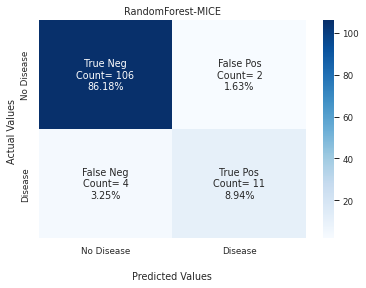

In [542]:
confusionMatrixView(mice_rf, X_test_mice, y_test_mice, 'RandomForest-MICE')

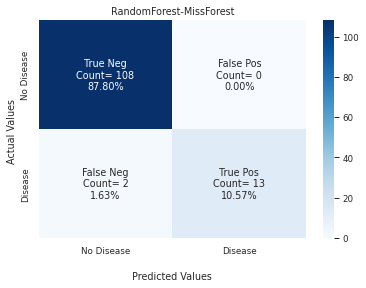

In [543]:
confusionMatrixView(missforest_rf, X_test_missforest, y_test_missforest, 'RandomForest-MissForest')

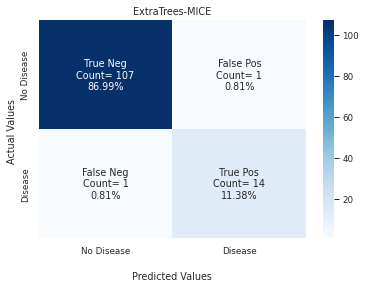

In [403]:
confusionMatrixView(mice_etc, X_test_mice, y_test_mice, 'ExtraTrees-MICE')

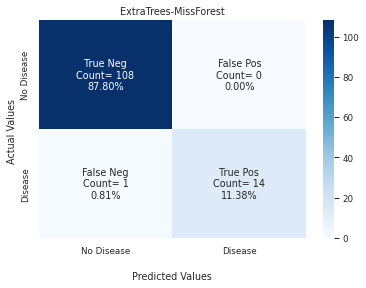

In [404]:
confusionMatrixView(missforest_etc, X_test_missforest, y_test_missforest, 'ExtraTrees-MissForest')

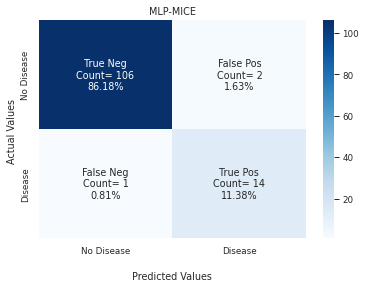

In [544]:
confusionMatrixView(mlp_model_mice, X_test_mice, y_test_mice, 'MLP-MICE')

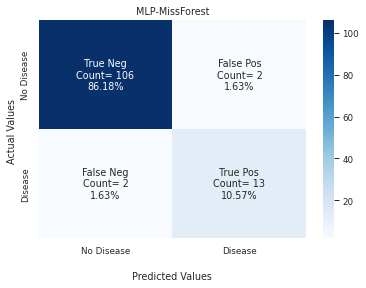

In [545]:
confusionMatrixView(mlp_model_missforest, X_test_missforest, y_test_missforest, 'MLP-MissForest')

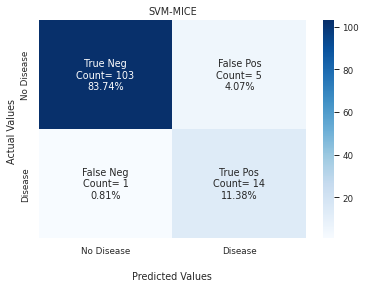

In [546]:
confusionMatrixView(mice_svm, X_test_mice, y_test_mice, 'SVM-MICE')

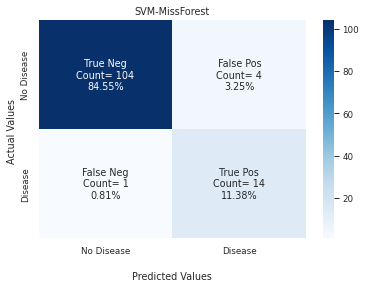

In [547]:
confusionMatrixView(missforest_svm, X_test_missforest, y_test_missforest, 'SVM-MissForest')

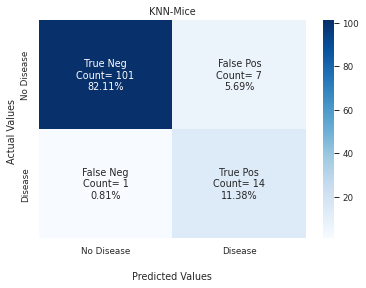

In [548]:
confusionMatrixView(mice_knn, X_test_mice, y_test_mice, 'KNN-Mice')

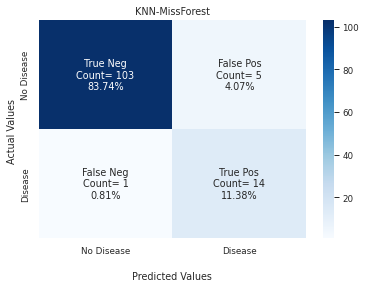

In [549]:
confusionMatrixView(missforest_knn, X_test_missforest, y_test_missforest, 'KNN-MissForest')

##Classification Reports

In [244]:
precision_list, recall_list, f1_score_list = [], [], []

In [245]:
def classif_rep(model, x_test, y_test): 
  prediction = model.predict(x_test)

  list_metrics = []

  # list_metrics.append()

  list_metrics.append(metrics.precision_score(y_test, prediction, average='weighted'))
  list_metrics.append(metrics.recall_score(y_test, prediction, average='weighted'))
  list_metrics.append(metrics.f1_score(y_test, prediction, average='weighted'))

  print(metrics.classification_report(y_test, prediction, digits=5))
  
  return list_metrics

In [246]:
RF_mice_classif_rep_list = classif_rep(mice_rf, X_test_mice, y_test_mice)

precision_list.append(RF_mice_classif_rep_list[0]) 
recall_list.append(RF_mice_classif_rep_list[1])
f1_score_list.append(RF_mice_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.96364   0.98148   0.97248       108
           1    0.84615   0.73333   0.78571        15

    accuracy                        0.95122       123
   macro avg    0.90490   0.85741   0.87910       123
weighted avg    0.94931   0.95122   0.94970       123



In [247]:
RF_missforest_classif_rep_list = classif_rep(missforest_rf, X_test_missforest, y_test_missforest)

precision_list.append(RF_missforest_classif_rep_list[0]) 
recall_list.append(RF_missforest_classif_rep_list[1])
f1_score_list.append(RF_missforest_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.98182   1.00000   0.99083       108
           1    1.00000   0.86667   0.92857        15

    accuracy                        0.98374       123
   macro avg    0.99091   0.93333   0.95970       123
weighted avg    0.98404   0.98374   0.98323       123



In [248]:
ETC_mice_classif_rep_list = classif_rep(mice_etc, X_test_mice, y_test_mice)

precision_list.append(ETC_mice_classif_rep_list[0]) 
recall_list.append(ETC_mice_classif_rep_list[1])
f1_score_list.append(ETC_mice_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.99074   0.99074   0.99074       108
           1    0.93333   0.93333   0.93333        15

    accuracy                        0.98374       123
   macro avg    0.96204   0.96204   0.96204       123
weighted avg    0.98374   0.98374   0.98374       123



In [249]:
ETC_missforest_classif_rep_list = classif_rep(missforest_etc, X_test_missforest, y_test_missforest)

precision_list.append(ETC_missforest_classif_rep_list[0]) 
recall_list.append(ETC_missforest_classif_rep_list[1])
f1_score_list.append(ETC_missforest_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.99083   1.00000   0.99539       108
           1    1.00000   0.93333   0.96552        15

    accuracy                        0.99187       123
   macro avg    0.99541   0.96667   0.98045       123
weighted avg    0.99194   0.99187   0.99175       123



In [250]:
MLP_mice_classif_rep_list = classif_rep(mlp_model_mice, X_test_mice, y_test_mice)

precision_list.append(MLP_mice_classif_rep_list[0]) 
recall_list.append(MLP_mice_classif_rep_list[1])
f1_score_list.append(MLP_mice_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.99065   0.98148   0.98605       108
           1    0.87500   0.93333   0.90323        15

    accuracy                        0.97561       123
   macro avg    0.93283   0.95741   0.94464       123
weighted avg    0.97655   0.97561   0.97595       123



In [251]:
MLP_missforest_classif_rep_list = classif_rep(mlp_model_missforest, X_test_missforest, y_test_missforest)

precision_list.append(MLP_missforest_classif_rep_list[0]) 
recall_list.append(MLP_missforest_classif_rep_list[1])
f1_score_list.append(MLP_missforest_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.98148   0.98148   0.98148       108
           1    0.86667   0.86667   0.86667        15

    accuracy                        0.96748       123
   macro avg    0.92407   0.92407   0.92407       123
weighted avg    0.96748   0.96748   0.96748       123



In [252]:
SVM_mice_classif_rep_list = classif_rep(mice_svm, X_test_mice, y_test_mice)

precision_list.append(SVM_mice_classif_rep_list[0]) 
recall_list.append(SVM_mice_classif_rep_list[1])
f1_score_list.append(SVM_mice_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.99038   0.95370   0.97170       108
           1    0.73684   0.93333   0.82353        15

    accuracy                        0.95122       123
   macro avg    0.86361   0.94352   0.89761       123
weighted avg    0.95946   0.95122   0.95363       123



In [253]:
SVM_missforest_classif_rep_list = classif_rep(missforest_svm, X_test_missforest, y_test_missforest)

precision_list.append(SVM_missforest_classif_rep_list[0]) 
recall_list.append(SVM_missforest_classif_rep_list[1])
f1_score_list.append(SVM_missforest_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.99048   0.96296   0.97653       108
           1    0.77778   0.93333   0.84848        15

    accuracy                        0.95935       123
   macro avg    0.88413   0.94815   0.91251       123
weighted avg    0.96454   0.95935   0.96091       123



In [254]:
KNN_mice_classif_rep_list = classif_rep(mice_knn, X_test_mice, y_test_mice)

precision_list.append(KNN_mice_classif_rep_list[0]) 
recall_list.append(KNN_mice_classif_rep_list[1])
f1_score_list.append(KNN_mice_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.99020   0.93519   0.96190       108
           1    0.66667   0.93333   0.77778        15

    accuracy                        0.93496       123
   macro avg    0.82843   0.93426   0.86984       123
weighted avg    0.95074   0.93496   0.93945       123



In [255]:
KNN_missforest_classif_rep_list = classif_rep(missforest_knn, X_test_missforest, y_test_missforest)

precision_list.append(KNN_missforest_classif_rep_list[0]) 
recall_list.append(KNN_missforest_classif_rep_list[1])
f1_score_list.append(KNN_missforest_classif_rep_list[2])

              precision    recall  f1-score   support

           0    0.99038   0.95370   0.97170       108
           1    0.73684   0.93333   0.82353        15

    accuracy                        0.95122       123
   macro avg    0.86361   0.94352   0.89761       123
weighted avg    0.95946   0.95122   0.95363       123



##ROC_AUC

In [327]:
roc_auc_score_list = []

In [328]:
def roc_auc_curve_plot(model, x_test, y_test,titles=''):
  sns.set_theme(context='paper')

  y_score = model.predict_proba(x_test)[:,1]

  # print(y_score)
  false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_score)

  print(f"roc_auc_score for {model} :  {metrics.roc_auc_score(y_test, y_score)}")
  # print(threshold)

  plt.subplots(1, figsize=(6,5))

  plt.title('Receiver Operating Characteristic - '+titles)

  plt.plot(false_positive_rate, true_positive_rate)

  plt.plot([0, 1], ls="--")

  plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")

  plt.ylabel('True Positive Rate')

  plt.xlabel('False Positive Rate')

  plt.show()
  
  return metrics.roc_auc_score(y_test, y_score)

roc_auc_score for RandomForestClassifier(bootstrap=False, max_depth=75, max_features='sqrt',
                       min_samples_split=3, n_estimators=48, random_state=42) :  0.9944444444444445


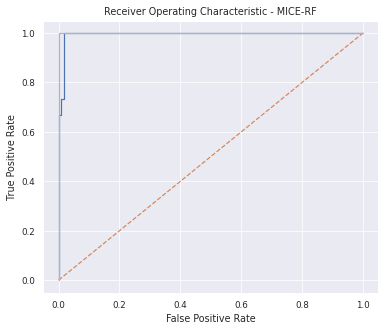

In [329]:
roc_auc_score_list.append(roc_auc_curve_plot(mice_rf, X_test_mice, y_test_mice, 'MICE-RF'))

roc_auc_score for RandomForestClassifier(bootstrap=False, max_depth=51, max_features='sqrt',
                       n_estimators=36, random_state=42) :  0.9938271604938272


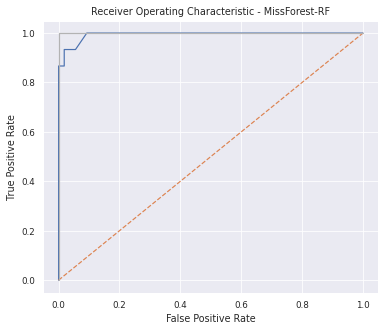

In [330]:
roc_auc_score_list.append(roc_auc_curve_plot(missforest_rf,  X_test_missforest, y_test_missforest, 'MissForest-RF'))

roc_auc_score for ExtraTreesClassifier(max_depth=60, max_features='sqrt', n_estimators=48,
                     random_state=42) :  0.9941358024691358


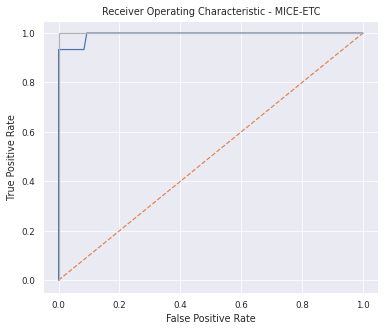

In [331]:
roc_auc_score_list.append(roc_auc_curve_plot(mice_etc, X_test_mice, y_test_mice, 'MICE-ETC'))

roc_auc_score for ExtraTreesClassifier(max_depth=42, max_features='sqrt', min_samples_split=3,
                     n_estimators=60, random_state=42) :  0.9929012345679012


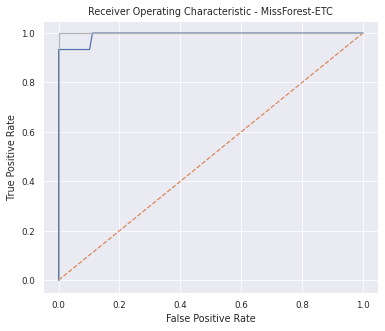

In [332]:
roc_auc_score_list.append(roc_auc_curve_plot(missforest_etc, X_test_missforest, y_test_missforest, 'MissForest-ETC'))

roc_auc_score for RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
                   estimator=MLPClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001],
                                        'hidden_layer_sizes': [(100, 200, 100),
                                                               (50, 100, 50)],
                                        'learning_rate': ['invscaling',
                                                          'adaptive'],
                                        'max_iter': [500, 1000],
                                        'solver': ['adam'],
                                        'warm_start': [True, False]},
                   verbose=2) :  0.9697530864197531


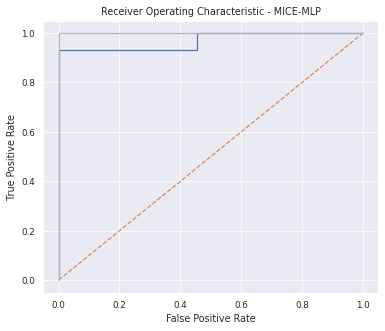

In [333]:
roc_auc_score_list.append(roc_auc_curve_plot(mlp_model_mice,  X_test_mice, y_test_mice, 'MICE-MLP'))

roc_auc_score for RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
                   estimator=MLPClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001],
                                        'hidden_layer_sizes': [(100, 200, 100),
                                                               (50, 100, 50)],
                                        'learning_rate': ['invscaling',
                                                          'adaptive'],
                                        'max_iter': [500, 1000],
                                        'solver': ['adam'],
                                        'warm_start': [True, False]},
                   verbose=2) :  0.9771604938271605


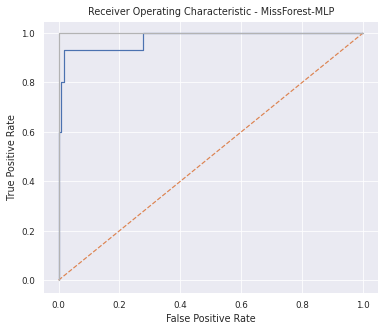

In [334]:
roc_auc_score_list.append(roc_auc_curve_plot(mlp_model_missforest,  X_test_missforest, y_test_missforest, 'MissForest-MLP'))

roc_auc_score for CalibratedClassifierCV(base_estimator=SVC(C=10, decision_function_shape='ovo',
                                          degree=1, gamma=1)) :  0.9790123456790124


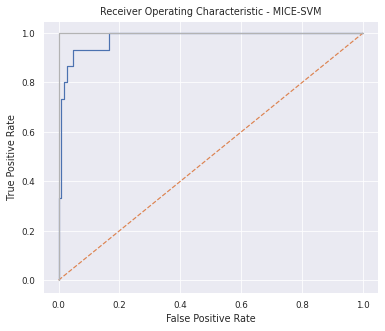

In [335]:
roc_auc_score_list.append(roc_auc_curve_plot(mice_svm,  X_test_mice, y_test_mice, 'MICE-SVM'))

roc_auc_score for CalibratedClassifierCV(base_estimator=SVC(C=10, decision_function_shape='ovo',
                                          degree=1, gamma=1)) :  0.9820987654320987


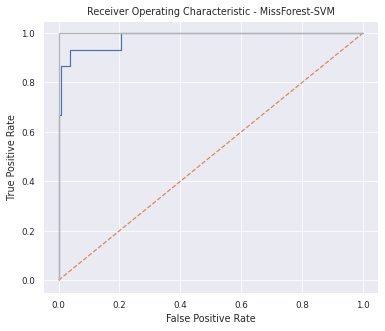

In [336]:
roc_auc_score_list.append(roc_auc_curve_plot(missforest_svm,  X_test_missforest, y_test_missforest, 'MissForest-SVM'))

roc_auc_score for KNeighborsClassifier(leaf_size=10, metric='manhattan', weights='distance') :  0.9459876543209875


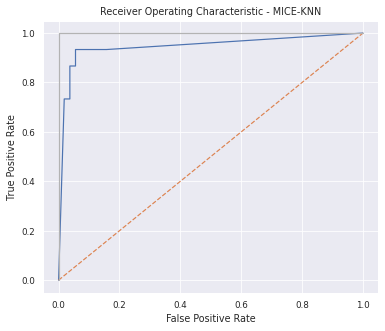

In [337]:
roc_auc_score_list.append(roc_auc_curve_plot(mice_knn,  X_test_mice, y_test_mice, 'MICE-KNN'))

roc_auc_score for KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=11,
                     weights='distance') :  0.9580246913580248


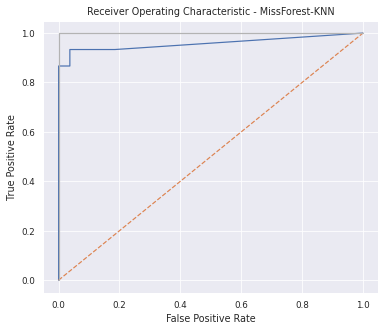

In [338]:
roc_auc_score_list.append(roc_auc_curve_plot(missforest_knn,  X_test_missforest, y_test_missforest, 'MissForest-KNN'))

In [339]:
roc_auc_score_list

[0.9944444444444445,
 0.9938271604938272,
 0.9941358024691358,
 0.9929012345679012,
 0.9697530864197531,
 0.9771604938271605,
 0.9790123456790124,
 0.9820987654320987,
 0.9459876543209875,
 0.9580246913580248]

**All ROC-AUC Plot Comparison**

*Models Using MissForest Imputed Dataset*

In [340]:
pred_prob_RF_mice = mice_rf.predict_proba(X_test_mice)

pred_prob_ETC_mice = mice_etc.predict_proba(X_test_mice)

pred_prob_MLP_mice = mlp_model_mice.predict_proba(X_test_mice)

pred_prob_svm_mice = mice_svm.predict_proba(X_test_mice)

pred_prob_knn_mice = mice_knn.predict_proba(X_test_mice)

In [341]:
#False Positive Rate, True Positive Rate, Threshold value collect
fpr_rf_mice, tpr_rf_mice, thresh_rf_mice = metrics.roc_curve(y_test_mice, pred_prob_RF_mice[:,1], pos_label=1)

fpr_etc_mice, tpr_etc_mice, thresh_etc_mice = metrics.roc_curve(y_test_mice, pred_prob_ETC_mice[:,1], pos_label=1)

fpr_mlp_mice, tpr_mlp_mice, thresh_mlp_mice = metrics.roc_curve(y_test_mice, pred_prob_MLP_mice[:,1], pos_label=1)

fpr_svm_mice, tpr_svm_mice, thresh_svm_mice = metrics.roc_curve(y_test_mice, pred_prob_svm_mice[:,1], pos_label=1)

fpr_knn_mice, tpr_knn_mice, thresh_knn_mice = metrics.roc_curve(y_test_mice, pred_prob_knn_mice[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs_mice = [0 for i in range(len(X_test_mice))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test_mice, random_probs_mice, pos_label=1)

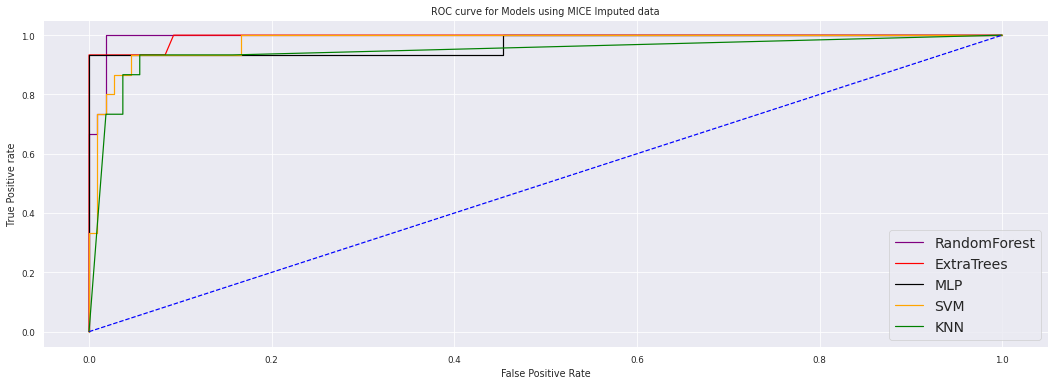

In [342]:
plt.figure(figsize=(18,6))
plt.plot(fpr_rf_mice, tpr_rf_mice, linestyle='-',color='purple', label='RandomForest')

plt.plot(fpr_etc_mice, tpr_etc_mice, linestyle='-',color='red', label='ExtraTrees')

plt.plot(fpr_mlp_mice, tpr_mlp_mice, linestyle='-',color='black', label='MLP')

plt.plot(fpr_svm_mice, tpr_svm_mice, linestyle='-',color='orange', label='SVM')

plt.plot(fpr_knn_mice, tpr_knn_mice, linestyle='-',color='green', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve for Models using MICE Imputed data')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best', fontsize=14)
# plt.savefig('ROC',dpi=300)
plt.show();

*Models Using MissForest Imputed Dataset*

In [343]:
pred_prob_RF_missforest = missforest_rf.predict_proba(X_test_missforest)

pred_prob_ETC_missforest = missforest_etc.predict_proba(X_test_missforest)

pred_prob_MLP_missforest = mlp_model_missforest.predict_proba(X_test_missforest)

pred_prob_svm_missforest = missforest_svm.predict_proba(X_test_missforest)

pred_prob_knn_missforest = missforest_knn.predict_proba(X_test_missforest)

In [344]:
#False Positive Rate, True Positive Rate, Threshold value collect
fpr_rf, tpr_rf, thresh_rf = metrics.roc_curve(y_test_missforest, pred_prob_RF_missforest[:,1], pos_label=1)

fpr_etc, tpr_etc, thresh_etc = metrics.roc_curve(y_test_missforest, pred_prob_ETC_missforest[:,1], pos_label=1)

fpr_mlp, tpr_mlp, thresh_mlp = metrics.roc_curve(y_test_missforest, pred_prob_MLP_missforest[:,1], pos_label=1)

fpr_svm, tpr_svm, thresh_svm = metrics.roc_curve(y_test_missforest, pred_prob_svm_missforest[:,1], pos_label=1)

fpr_knn, tpr_knn, thresh_knn = metrics.roc_curve(y_test_missforest, pred_prob_knn_missforest[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(X_test_missforest))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test_missforest.values, random_probs, pos_label=1)

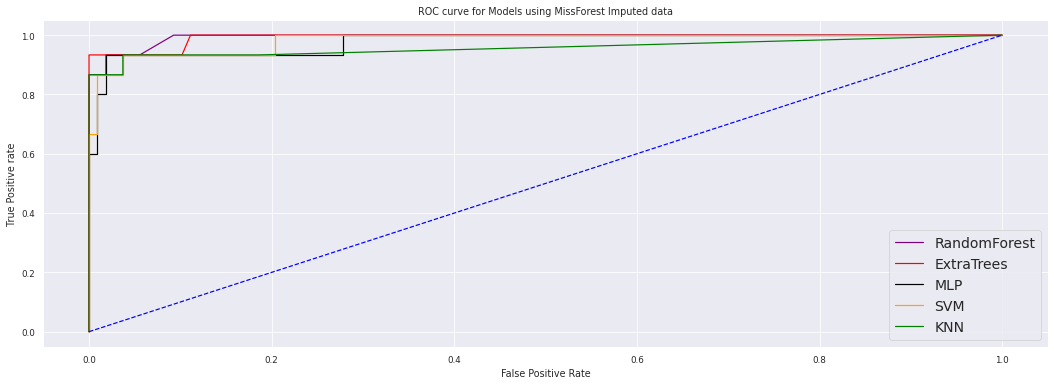

In [345]:
plt.figure(figsize=(18,6))
plt.plot(fpr_rf, tpr_rf, linestyle='-',color='purple', label='RandomForest')

plt.plot(fpr_etc, tpr_etc, linestyle='-',color='red', label='ExtraTrees')

plt.plot(fpr_mlp, tpr_mlp, linestyle='-',color='black', label='MLP')

plt.plot(fpr_svm, tpr_svm, linestyle='-',color='orange', label='SVM')

plt.plot(fpr_knn, tpr_knn, linestyle='-',color='green', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve for Models using MissForest Imputed data')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best', fontsize=14)
# plt.savefig('ROC',dpi=300)
plt.show();

**Different Metrics Comparison**

In [361]:
list_of_classif_values = list(zip(models_name, precision_list, recall_list, f1_score_list, roc_auc_score_list))

In [362]:
classif_comparison_df = pd.DataFrame(list_of_classif_values, columns=['Model Names', 'Precision', 'Recall', 'F1_score', 'ROC-AUC'])

In [363]:
classif_comparison_df.style.highlight_max(['Precision', 'Recall', 'F1_score', 'ROC-AUC'], axis=0).set_properties(**{'border': '1.3px solid green',
                          'color': 'black'}).format(precision=5)            

,Model Names,Precision,Recall,F1_score,ROC-AUC
0,RandomForest-MICE,0.94931,0.95122,0.94970,0.99444
1,RandomForest-MissForest,0.98404,0.98374,0.98323,0.99383
2,ExtraTrees-MICE,0.98374,0.98374,0.98374,0.99414
3,ExtraTrees-MissForest,0.99194,0.99187,0.99175,0.99290
4,MLP-MICE,0.97655,0.97561,0.97595,0.96975
5,MLP-MissForest,0.96748,0.96748,0.96748,0.97716
6,SVM-MICE,0.95946,0.95122,0.95363,0.97901
7,SVM-MissForest,0.96454,0.95935,0.96091,0.98210
8,KNN-MICE,0.95074,0.93496,0.93945,0.94599
9,KNN-MissForest,0.95946,0.95122,0.95363,0.95802


##Model Comparison Visualization

In [346]:
model_score_list = []
model_names = ['RF_MICE', 'RF_MissForest', 'ETC_MICE', 'ETC_MissForest', 'MLP_MICE', 'MLP_MissForest', 
               'SVM_MICE', 'SVM_MissForest', 'KNN_MICE', 'KNN_MissForest']

In [347]:
data_score = {'Model Name': model_names,
        'Model Score': model_accuracy_score}

In [348]:
df_model_compare = pd.DataFrame(data_score)

In [349]:
fig = px.bar_polar(df_model_compare, r = "Model Score", theta = "Model Name",
                   color = "Model Name", template = "seaborn", log_r=True,
                   color_discrete_sequence = px.colors.sequential.Plasma_r, width=800, height=500)
fig.update_layout(
    title='Model Accuracy Comparison',
    legend_font_size=12,
   )
fig.show()

**Radar Plot to Compare Accuracy of Validation Methods**

In [453]:
categories = models_name 

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= model_accuracy_score ,
      theta=categories,
      fill='toself',
      name='Accuracy'
))

fig.add_trace(go.Scatterpolar(
      r=nested_cv_acc_list ,
      theta=categories,
      fill='toself',
      name='Nested CV Accuracy'
))

fig.add_trace(go.Scatterpolar(
      r=norm_cv_acc_list ,
      theta=categories,
      fill='toself',
      name='Non-nested CV Accuracy'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0.93, 0.999]
    )),
    width=800, height=500,
  showlegend=True
)

fig.show()

In [521]:
categories = models_name 

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=roc_auc_score_list  ,
      theta=categories,
      fill='toself',
      line=dict(width=2),
      name='ROC-AUC score',
      # opacity=0.4
))

fig.add_trace(go.Scatterpolar(
      r= precision_list ,
      theta=categories,
      fill='toself',
      line=dict(width=2,  color= 'red'),
      name='Precision',
      # opacity=0.5
))

fig.add_trace(go.Scatterpolar(
      r=recall_list  ,
      theta=categories,
      fill='none',
      # fillcolor='black', 
      line=dict(width=5, color= 'black'),
      name='Recall',
      # opacity=0.5
))

fig.add_trace(go.Scatterpolar(
      r=f1_score_list  ,
      theta=categories,
      fill='none',
      # fillcolor='yellow', 
      # line=dict(width=5, dash= 'dash', color= 'floralwhite'),
      line=dict(width=3, color= 'lawngreen'),
      name='F1-Score',
      # opacity=0.4
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True, 
      range=[0.92, 1]
    )),
    width=800, height=500,
  showlegend=True
)

fig.show()

#**Saving Model**

In [352]:
# filename_sm_mf_ef = 'ETC_model_sm_mf.sav'
# joblib.dump(sm_mf_ef, filename_sm_mf_ef)
 
# # load the model from disk
# loaded_model = joblib.load(filename_sm_mf_ef)
# result = loaded_model.score(sm_mf_Xtest, sm_mf_Ytest)
# print(result)

In [353]:
# filename_ada_mf_ef = 'ETC_model_ada_mf.sav'
# joblib.dump(ada_mf_ef, filename_ada_mf_ef)
 
# # load the model from disk
# loaded_model = joblib.load(filename_ada_mf_ef)
# result = loaded_model.score(ada_mf_Xtest, ada_mf_Ytest)
# print(result)

**Statistical Significance Test**

In [354]:
# from mlxtend.evaluate import paired_ttest_5x2cv

In [355]:
# from imblearn.pipeline import Pipeline
# from imblearn.pipeline import make_pipeline

In [356]:
# pipe_grid = {'extratreesclassifier':[ensemble.ExtraTreesClassifier()],
# 'extratreesclassifier__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],

# 'extratreesclassifier__max_features': max_features,

# 'extratreesclassifier__max_depth': [int(x) for x in np.linspace(6, 120, num = 20)],

# 'extratreesclassifier__min_samples_split': min_samples_split,

# 'extratreesclassifier__min_samples_leaf': [1, 2, 3]}

# pipe_grid_rf = {'randomforestclassifier':[ensemble.RandomForestClassifier()],
# 'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],

# 'randomforestclassifier__max_features': max_features,

# 'randomforestclassifier__max_depth': [int(x) for x in np.linspace(6, 120, num = 20)],

# 'randomforestclassifier__min_samples_split': min_samples_split,

# 'randomforestclassifier__min_samples_leaf': [1, 2, 3]}

In [357]:
# cross_model_etc=model_selection.RandomizedSearchCV( make_pipeline((preprocessing.RobustScaler(quantile_range=(5,95))),
#                                                               (over_sampling.SMOTE(random_state = 42)), 
#                                                               (ensemble.ExtraTreesClassifier())),
#                                                               param_distributions = pipe_grid, 
#                                                               n_iter = 100, 
#                                                cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
#                                                verbose=2,  n_jobs = -1)

In [358]:
# cross_model_rf=model_selection.RandomizedSearchCV( make_pipeline((preprocessing.RobustScaler(quantile_range=(5,95))),
#                                                               (over_sampling.SMOTE(random_state = 42)), 
#                                                               (ensemble.RandomForestClassifier())),
#                                                               param_distributions = pipe_grid_rf, 
#                                                               n_iter = 100, 
#                                                cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
#                                                verbose=2,  n_jobs = -1)

In [359]:
# t, p = paired_ttest_5x2cv(estimator1=cross_model_etc,
#                           estimator2=cross_model_rf,
#                           X=df_mf_predictor, y=df_mf_target,
#                           random_seed=1)

In [360]:
# print('t statistic: %.3f' % t)
# print('p value: %.3f' % p)